In [1]:
threads = 16
import os
os.environ["MKL_NUM_THREADS"] = str(threads)
os.environ["NUMEXPR_NUM_THREADS"] = str(threads)
os.environ["OMP_NUM_THREADS"] = str(threads)


import Functions as fn
import numpy as np
import CRUMPET
import matplotlib.pyplot as plt
import fc_mapping as fc
import scipy.interpolate as interpolate
import scipy.integrate as integrate

## Testing model with Bolzmann fit

In [2]:
fn.gen_input('input_false.dat', vibr_lap=True, incl_ground=True, diss=False)
crm = CRUMPET.Crumpet('input_false.dat')

['H2VIBR', 'H.2', '2.0t0']
['H2VIBR', 'H.2', '2.0t1']
['H2VIBR', 'H.2', '2.0t2']
['H2VIBR', 'H.2', '2.0t3']
['H2VIBR', 'H.2', '2.0t4']
['H2VIBR', 'H.2', '2.0t5']
['H2VIBR', 'H.2', '2.0t6']
['H2VIBR', 'H.2', '2.0t7']
['H2VIBR', 'H.2', '2.0t8']
['H2VIBR', 'H.2', '2.0t9']
['H2VIBR', 'H.2', '2.0t10']
['H2VIBR', 'H.2', '2.0t11']
['H2VIBR', 'H.2', '2.0t12']
['H2VIBR', 'H.2', '2.0t13']
['H2VIBR', 'H.2', '2.0t14']
['H2VIBR', 'H.2', '2.1t0']
['H2VIBR', 'H.2', '2.1t1']
['H2VIBR', 'H.2', '2.1t2']
['H2VIBR', 'H.2', '2.1t3']
['H2VIBR', 'H.2', '2.1t4']
['H2VIBR', 'H.2', '2.1t5']
['H2VIBR', 'H.2', '2.1t6']
['H2VIBR', 'H.2', '2.1t7']
['H2VIBR', 'H.2', '2.1t8']
['H2VIBR', 'H.2', '2.1t9']
['H2VIBR', 'H.2', '2.1t10']
['H2VIBR', 'H.2', '2.1t11']
['H2VIBR', 'H.2', '2.1t12']
['H2VIBR', 'H.2', '2.1t13']
['H2VIBR', 'H.2', '2.1t14']
['H2VIBR', 'H.2', '2.2t0']
['H2VIBR', 'H.2', '2.2t1']
['H2VIBR', 'H.2', '2.2t2']
['H2VIBR', 'H.2', '2.2t3']
['H2VIBR', 'H.2', '2.2t4']
['H2VIBR', 'H.2', '2.2t5']
['H2VIBR', 'H.2', 

100%|██████████| 15/15 [00:00<00:00, 4442.80it/s]


Constructing functional emissivity matrix


100%|██████████| 15/15 [00:00<00:00, 5899.16it/s]


Constructing functional energy transfer matrix


100%|██████████| 15/15 [00:00<00:00, 6237.81it/s]


In [6]:
# Run CRM as function of temperature
Te_reso = 50
# crm.source[2] = 1e-10
iso_mass = 2
Hmin = False

# indx_mol = np.append(0,np.arange(1,)
Tev = 10**np.linspace(np.log10(0.1), np.log10(100), Te_reso)
Tiv = Tev/iso_mass
ne = 1e19*np.ones(len(Tev))

fv_H2 = np.zeros((len(crm.species),len(Tev)))
for i in range(0,len(Tev)):
    fv_H2[:,i]=crm.steady_state(Tev[i],ne[i],Ti=Tiv[i],plot=False,dt=True)

fv_H2 = fv_H2/(np.sum(fv_H2, axis=0)[None,:])

 lsoda--  at t (=r1) and step size h (=r2), the      
       corrector convergence failed repeatedly       
       or with abs(h) = hmin    l
      in above,  r1 =  0.0000000000000D+00   r2 =  0.1892292188690D-17


/usr/lib/python3/dist-packages/scipy/integrate/_ode.py:1350: UserWarning: lsoda: Repeated convergence failures (perhaps bad Jacobian or tolerances).
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,


 lsoda--  at t (=r1) and step size h (=r2), the      
       corrector convergence failed repeatedly       
       or with abs(h) = hmin    l
      in above,  r1 =  0.0000000000000D+00   r2 =  0.1417392259904D-17
 lsoda--  at t (=r1) and step size h (=r2), the      
       corrector convergence failed repeatedly       
       or with abs(h) = hmin    l
      in above,  r1 =  0.0000000000000D+00   r2 =  0.1061675797450D-17
 lsoda--  at t (=r1) and step size h (=r2), the      
       corrector convergence failed repeatedly       
       or with abs(h) = hmin    l
      in above,  r1 =  0.0000000000000D+00   r2 =  0.7952318710754D-18
 lsoda--  at t (=r1) and step size h (=r2), the      
       corrector convergence failed repeatedly       
       or with abs(h) = hmin    l
      in above,  r1 =  0.0000000000000D+00   r2 =  0.5956561600942D-18
 lsoda--  at t (=r1) and step size h (=r2), the      
       corrector convergence failed repeatedly       
       or with abs(h) = hmin    l
      

KeyboardInterrupt: 

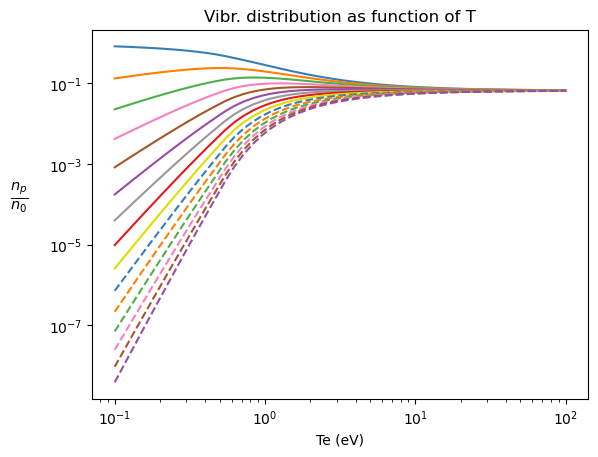

In [4]:
# Plot distribution
indx_X1 = np.append(0,np.arange(1,15))
plt.loglog(Tev, np.transpose(fv_H2[indx_X1]))
# plt.ylim(1e-3,1e-1)
plt.xlabel('Te (eV)')
plt.ylabel(r'$\frac{n_p}{n_0}$        ',rotation=0,size=15)
plt.title('Vibr. distribution as function of T')
plt.show()

Text(0.5, 0, 'Temperature (eV)')

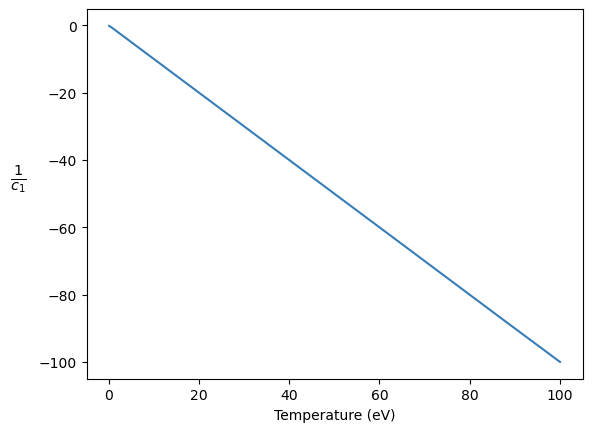

In [5]:
# Plot 1/c_1 as function of temperature
fv = fv_H2

E = fn.get_energies('X1Sg')
err, coeff = fn.err_bolzmann(fv,E)



plt.plot(Tev, 1/coeff, label='H2VIBR')
plt.ylabel(r'$\frac{1}{c_1}$     ' ,rotation=0,size=15)
plt.xlabel('Temperature (eV)')

Text(0.5, 1.0, 'Deviation from Bolzmann distribution as a function of temperature')

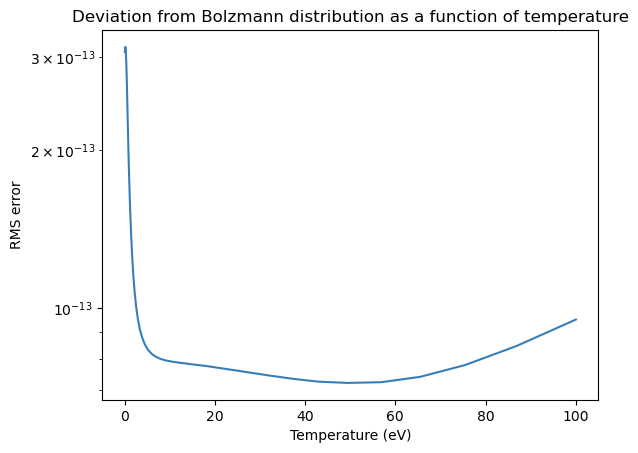

In [6]:
# Plot of the rms deviation from exponential fit
plt.figure()
plt.yscale('log')
plt.plot(Tev,err)
# plt.plot(Tev,err_ichi, label='Ichihara')
plt.ylabel('RMS error')
plt.xlabel('Temperature (eV)')
# plt.legend()
plt.title("Deviation from Bolzmann distribution as a function of temperature")

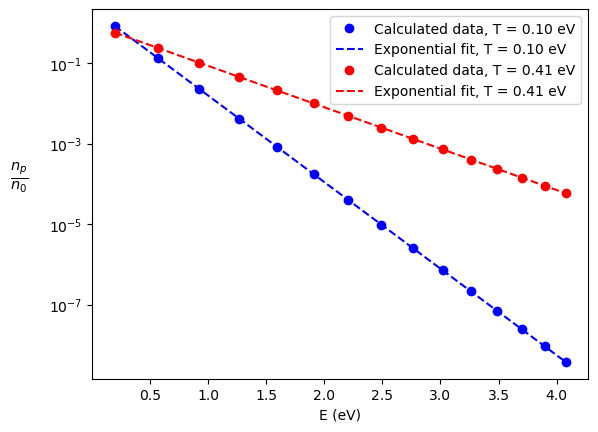

In [7]:
# Plot of distribution at given temperature
i = 0
plt.figure()
plt.yscale('log')
plt.plot(E,fv[:, i], 'bo', label='Calculated data, T = %1.2f eV' %Tev[i])

y = np.log(fv[:,i])
c = np.flip(np.polyfit(E,y, 1))

fit = fn.fit_eval(c,E)
plt.plot(E,fit,'b--', label='Exponential fit, T = %1.2f eV' %Tev[i])

i = 10
plt.plot(E,fv[:, i], 'ro', label='Calculated data, T = %1.2f eV' %Tev[i])

y = np.log(fv[:,i])
c = np.flip(np.polyfit(E,y, 1))

fit = fn.fit_eval(c,E)
plt.plot(E,fit,'r--', label='Exponential fit, T = %1.2f eV' %Tev[i])


plt.xlabel('E (eV)')
plt.ylabel(r'$\frac{n_p}{n_0}$        ',rotation=0,size=15)
plt.legend()
plt.show()

## Generate input file for CRUMPET

The next cell can is used to generate an input file for CRUMPET. You can choose which reactions and species you want by marking them as True. 


In [3]:
fn.gen_input('input_fin.dat', vibr_lap = True, ion = True, B1=True, C1=True, EF1=True, incl_ground=False,a3=True,c3=True,d3=True,
             diss_att_B1=True, diss_att_X1=True, mol_cx=True, diss=True, rad_decay = True, inter_states=True, coll_deex=True, MA=True, MA_min=True)
# fn.gen_input('input_fin.dat', vibr_lap = True, ion = True, B1=True, C1=True, EF1=True, a3=True,
#              diss_att_B1=True, diss_att_X1=True, mol_cx=True, diss=True, rad_decay = True, inter_states=True, coll_deex=True, MA=True, MA_min=True)
# fn.gen_input('input_fin.dat', vibr_lap = True, diss=True)

Generating the CRM in CRUMPET

In [4]:
crm = CRUMPET.Crumpet('input_fin.dat');

['H2VIBR', 'H.2', '2.0t0']
['H2VIBR', 'H.2', '2.0t1']
['H2VIBR', 'H.2', '2.0t2']
['H2VIBR', 'H.2', '2.0t3']
['H2VIBR', 'H.2', '2.0t4']
['H2VIBR', 'H.2', '2.0t5']
['H2VIBR', 'H.2', '2.0t6']
['H2VIBR', 'H.2', '2.0t7']
['H2VIBR', 'H.2', '2.0t8']
['H2VIBR', 'H.2', '2.0t9']
['H2VIBR', 'H.2', '2.0t10']
['H2VIBR', 'H.2', '2.0t11']
['H2VIBR', 'H.2', '2.0t12']
['H2VIBR', 'H.2', '2.0t13']
['H2VIBR', 'H.2', '2.0t14']
['H2VIBR', 'H.2', '2.1t0']
['H2VIBR', 'H.2', '2.1t1']
['H2VIBR', 'H.2', '2.1t2']
['H2VIBR', 'H.2', '2.1t3']
['H2VIBR', 'H.2', '2.1t4']
['H2VIBR', 'H.2', '2.1t5']
['H2VIBR', 'H.2', '2.1t6']
['H2VIBR', 'H.2', '2.1t7']
['H2VIBR', 'H.2', '2.1t8']
['H2VIBR', 'H.2', '2.1t9']
['H2VIBR', 'H.2', '2.1t10']
['H2VIBR', 'H.2', '2.1t11']
['H2VIBR', 'H.2', '2.1t12']
['H2VIBR', 'H.2', '2.1t13']
['H2VIBR', 'H.2', '2.1t14']
['H2VIBR', 'H.2', '2.2t0']
['H2VIBR', 'H.2', '2.2t1']
['H2VIBR', 'H.2', '2.2t2']
['H2VIBR', 'H.2', '2.2t3']
['H2VIBR', 'H.2', '2.2t4']
['H2VIBR', 'H.2', '2.2t5']
['H2VIBR', 'H.2', 

100%|██████████| 106/106 [00:02<00:00, 51.37it/s]


Constructing functional emissivity matrix


100%|██████████| 106/106 [00:02<00:00, 48.35it/s]


Constructing functional energy transfer matrix


100%|██████████| 106/106 [00:01<00:00, 59.03it/s]


Run CRM as a function of temperature


In [5]:
# Initializing the indices for different species
indx_X1 = np.append(0,np.arange(1,15))
indx_B1 = np.append(15,np.arange(16,30))
indx_C1 = np.append(30,np.arange(31,45))
indx_EF1 = np.append(45,np.arange(46,60))
indx_a3 = np.append(60,np.arange(61,75))
indx_c3 = np.append(75,np.arange(76,90))
indx_d3 = np.append(90,np.arange(91,105))
indx_mol = np.arange(0,105)
indx_H2Plus = len(crm.species)-1
indx_Hmin = len(crm.species)



In [6]:
# Run CRM as function of temperature
# Te_reso = 100
# iso_mass = 2

# Tev = 10**np.linspace(np.log10(0.1), np.log10(100), Te_reso)
# Tiv = Tev/iso_mass
# ne = 1e19
# crm.source[0]=0

# fv_H2 = np.zeros((len(crm.species),len(Tev)))
# for i in range(0,len(Tev)):
#     fv_H2[:,i]=crm.steady_state(Tev[i],ne/1e6,Ti=Tiv[i],plot=False,dt=True)
#     print(i)

Te_reso = 100
Tev = 10**np.linspace(np.log10(0.1), np.log10(100), Te_reso)
iso_mass=2
Tiv = Tev/iso_mass
ne = 1e18

fv_H2 = fn.vibr_dist(crm,Tev,ne)
fv_H2 = fv_H2.reshape([len(crm.species)+1, len(Tev)])

# fv_H2_low = fn.vibr_dist(crm,Tev,ne)
# fv_H2 = fv_H2.reshape([len(crm.species), len(Tev)])




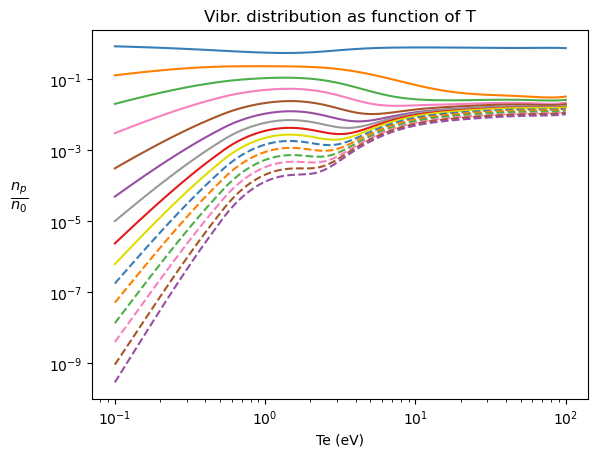

In [7]:
plt.loglog(Tev, np.transpose(fv_H2[indx_X1]))
# plt.ylim(1e-3,1e-1)
plt.xlabel('Te (eV)')
plt.ylabel(r'$\frac{n_p}{n_0}$        ',rotation=0,size=15)
plt.title('Vibr. distribution as function of T')
plt.show()

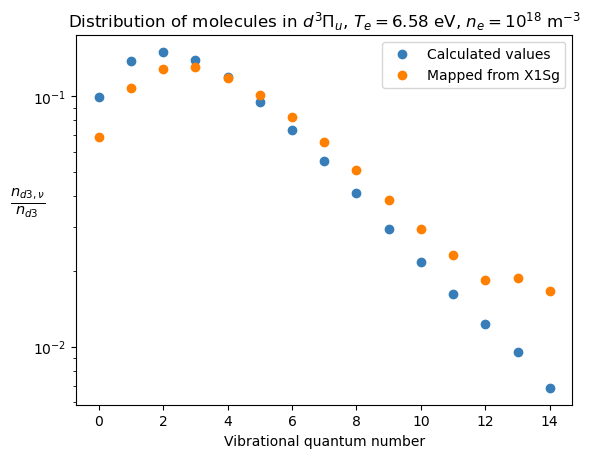

In [8]:
# Comparing d3 calculation to mapping
i=60
# plt.plot(fv_H2[indx_X1,i], label='H2[v] in ground state')
fv_d3 = fv_H2[indx_d3,i]
fv_d3 = fv_d3/np.sum(fv_d3[:-1])

fv_d3_mapped = fc.get_upper(ground=fv_H2[indx_X1,i])
fv_d3_mapped = fv_d3_mapped/np.sum(fv_d3_mapped)

plt.plot(fv_d3,'o',label = 'Calculated values')
plt.plot(fv_d3_mapped,'o', label = 'Mapped from X1Sg')



# plt.plot(fv_d3, label='H2[v] in Fulcher (to be compared against experiment)')
plt.xlabel('Vibrational quantum number')
plt.ylabel(r'$\frac{n_{d3,\nu}}{n_{d3}}$',rotation=0, size = 15)
plt.yscale('log')
plt.title(r'Distribution of molecules in $d^3\Pi_u$, $T_e=%1.2f$ eV, $n_e= 10^{%1.0f}$ m$^{-3}$' %(Tev[i], np.log10(ne)))
plt.legend()
plt.show()

0.20682362887177336 1.6297508346206444


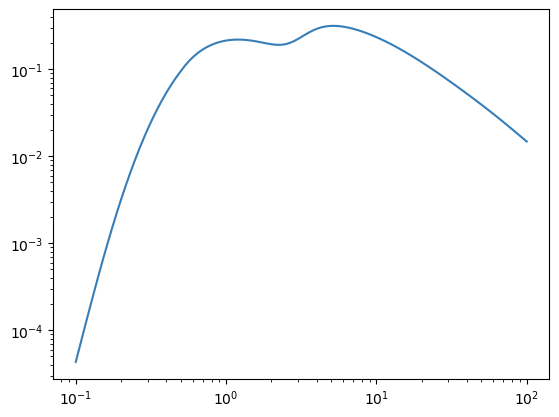

In [9]:
# Calculating MA rates

# Effective rates from model
r_cx, r_diss, r_ion, r_DA = fn.eff_rates(fv_H2,Tev)

X=CRUMPET.ratedata.RateData(rates={'AMJUEL' : '/rates/amjuel.tex', 'HYDHEL' : '/rates/HYDHEL.tex', 'H2VIBR' : 'rates/h2vibr.tex'})

# H2+ rates from AMJUEL 
diss_rec = fn.eval_2D(X.reactions['AMJUEL']['H.4']['2.2.14'],Tev,ne)
diss = fn.eval_2D(X.reactions['AMJUEL']['H.4']['2.2.12'],Tev,ne)
diss_ion = fn.eval_2D(X.reactions['AMJUEL']['H.4']['2.2.11'],Tev,ne)

# Effective rates from AMJUEL
r_cx_a = fn.eval_1D(X.reactions['AMJUEL']['H.2']['3.2.3'],Tev/2)
r_ion_a = fn.eval_2D(X.reactions['AMJUEL']['H.4']['2.2.9'],Tev, ne)
r_diss_a = fn.eval_2D(X.reactions['AMJUEL']['H.4']['2.2.5'],Tev, ne)
r_DA_a = fn.eval_1D(X.reactions['AMJUEL']['H.2']['2.2.17'], Tev)

# H- rates from AMJUEL
cx_Hmin = fn.eval_2D(crm.reactions['AMJUEL']['H.4']['7.2.3a'].coeffs,Tiv,ne)
ion_Hmin = fn.eval_2D(crm.reactions['AMJUEL']['H.4']['7.2.3b'].coeffs,Tiv,ne)

# Fraction of charge exchange from model
f_cx = r_cx/(r_cx+r_ion)

# Calculating H2+ MA rates from model
MAR = (r_cx+r_ion)/(diss_rec+diss+diss_ion)*diss_rec*f_cx
MAD = (r_cx+r_ion)/(diss_rec+diss+diss_ion)*(f_cx*diss+(1-f_cx)*diss_rec)
MAI = (r_cx+r_ion)/(diss_rec+diss+diss_ion)*(f_cx*diss_ion+(1-f_cx)*(diss+2*diss_ion))

# Fraction of charge exchange AMJUEL
f_cx_a = r_cx_a/(r_cx_a+r_ion)

# Calculation of H2+ MA rates AMJUEL 
MAR_a = (r_cx_a+r_ion_a)/(diss_rec+diss+diss_ion)*diss_rec*f_cx_a
MAD_a = (r_cx_a+r_ion_a)/(diss_rec+diss+diss_ion)*(f_cx_a*diss+(1-f_cx_a)*diss_rec)
MAI_a = (r_cx_a+r_ion_a)/(diss_rec+diss+diss_ion)*(f_cx_a*diss_ion+(1-f_cx_a)*(diss+2*diss_ion))

# Calculating H- MA rates from model 
MAR_Hmin = r_DA/(cx_Hmin+ion_Hmin)*cx_Hmin
MAD_Hmin = r_DA/(cx_Hmin+ion_Hmin)*ion_Hmin

plt.loglog(Tev,MAR_Hmin/(MAR+MAR_Hmin))
i=40
print(MAR_Hmin[i]/(MAR[i]+MAR_Hmin[i]), Tev[i])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


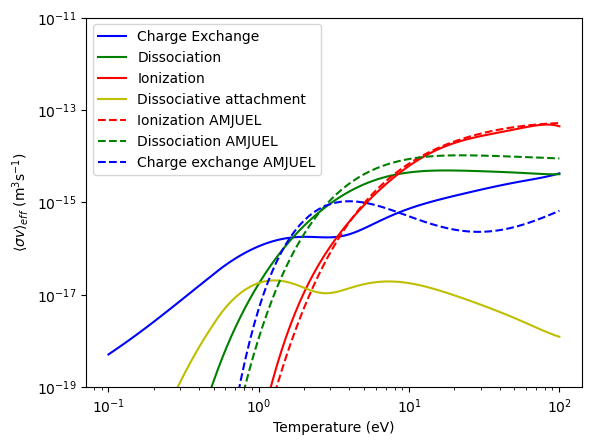

In [10]:
# Effective ionization, dissociation, CX and DA plot
plt.figure()
plt.loglog(Tev,r_cx,'b',label='Charge Exchange')
plt.plot(Tev,r_diss,'g',label='Dissociation')
plt.plot(Tev,r_ion,'r',label='Ionization')
plt.plot(Tev,r_DA,'y',label='Dissociative attachment')

plt.plot(Tev, r_ion_a,'r--',label='Ionization AMJUEL')
plt.plot(Tev, r_diss_a,'g--',label='Dissociation AMJUEL')
plt.plot(Tev, r_cx_a,'b--',label='Charge exchange AMJUEL')
# plt.plot(Tev, r_DA_a,'y--',label='Dissociative attachment AMJUEL')

plt.ylim(1e-19,1e-11)
plt.xlabel('Temperature (eV)')
plt.ylabel(r'$\langle \sigma v \rangle_{eff}$ (m$^3$s$^{-1}$)')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend()
plt.savefig('e_impact_rates.eps')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


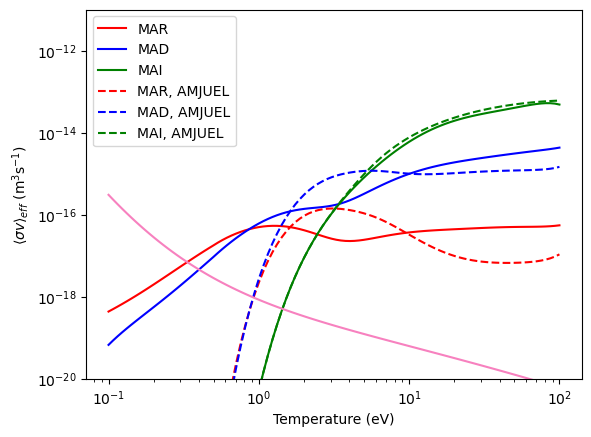

In [55]:
# MAR, MAI, MAD H2+ plot
plt.figure()
plt.loglog(Tev, MAR, 'r', label = r'MAR')
plt.loglog(Tev, MAD, 'b', label = r'MAD')
plt.loglog(Tev, MAI, 'g', label = r'MAI')

plt.loglog(Tev, MAR_a, 'r--', label = r'MAR, AMJUEL')
plt.loglog(Tev, MAD_a, 'b--', label = r'MAD, AMJUEL')
plt.loglog(Tev, MAI_a, 'g--', label = r'MAI, AMJUEL')
plt.loglog(Tev,fn.eval_2D(X.reactions['AMJUEL']['H.4']['2.1.8'],Tev,ne))

# plt.loglog(Tev, MAR_Hmin, 'y', label = r'MAR via D$^-$')
# plt.loglog(Tev, MAD_Hmin, 'c', label = r'MAD via D$^-$')

# plt.plot(Tev, r_diss_a,'g--',label='Dissociation AMJUEL')
# plt.plot(Tev,r_diss,'g',label='Dissociation')

# plt.plot(Tev, fn.eval_2D(X.reactions['AMJUEL']['H.4']['2.2.17D'],Tev/2, ne),'y--',label='MAD via D$^-$ AMJUEL')
# plt.plot(Tev, fn.eval_2D(X.reactions['AMJUEL']['H.4']['2.2.17R'],Tev/2, ne),'c--',label='MAR via D$^-$ AMJUEL')

plt.ylim(1e-20, 1e-11)
plt.xlabel('Temperature (eV)')
plt.ylabel(r'$\langle \sigma v \rangle_{eff}$ (m$^3$s$^{-1}$)')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend()
plt.savefig('figure.eps')


(1e-21, 1e-15)

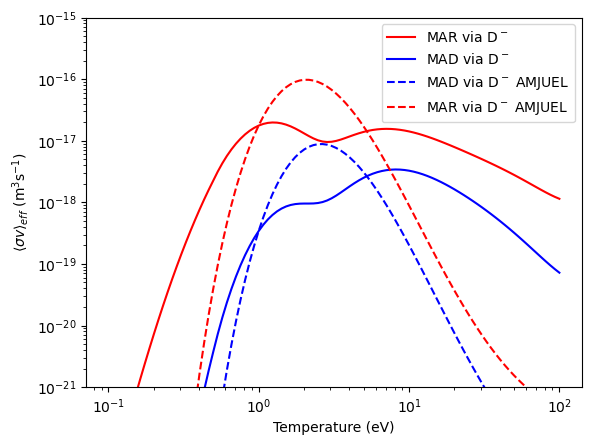

In [56]:
# MAR, MAD H- plot 
plt.figure()
plt.loglog(Tev, MAR_Hmin, 'r', label = r'MAR via D$^-$')
plt.loglog(Tev, MAD_Hmin, 'b', label = r'MAD via D$^-$')

plt.plot(Tev, fn.eval_2D(X.reactions['AMJUEL']['H.4']['2.2.17D'],Tev/2, ne),'b--',label='MAD via D$^-$ AMJUEL')
plt.plot(Tev, fn.eval_2D(X.reactions['AMJUEL']['H.4']['2.2.17R'],Tev/2, ne),'r--',label='MAR via D$^-$ AMJUEL')
plt.legend()
plt.xlabel('Temperature (eV)')
plt.ylabel(r'$\langle \sigma v \rangle_{eff}$ (m$^3$s$^{-1}$)')
plt.ylim(1e-21,1e-15)

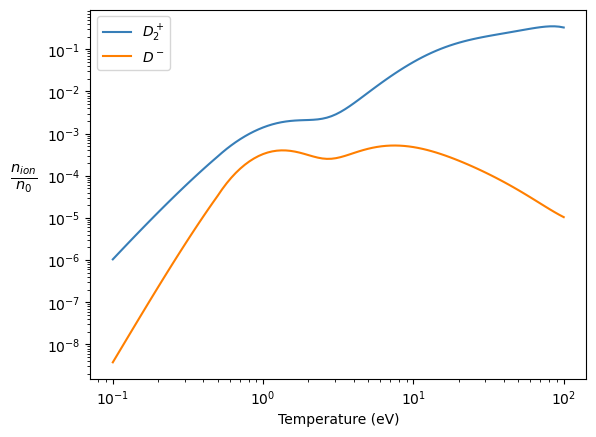

In [57]:
# Plot of D2+ and D- fractions
plt.loglog(Tev,fv_H2[indx_H2Plus], label=r'$D_2^+$')
plt.loglog(Tev,fv_H2[indx_Hmin], label=r'$D^-$')
plt.xlabel('Temperature (eV)')
plt.ylabel(r'$\frac{n_{ion}}{n_0}$      ', rotation=0,size=15)
plt.legend()

Text(0.5, 1.0, '$T_e=0.1$ eV')

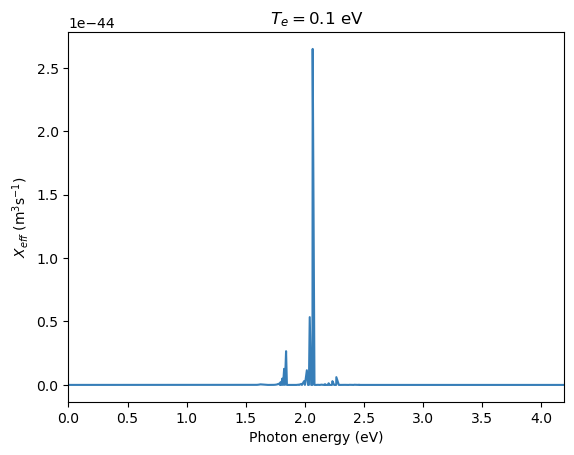

In [58]:
# Calculate effective line emission coefficients 
Xeff = fn.get_Xeff(crm,fv_H2,'d3Pu','a3Sg',ne)

i=0
plt.plot(Xeff[i][:,0],Xeff[i][:,1])
plt.xlim(max(0,min(Xeff[i][:,0])),max(Xeff[i][:,0]))
plt.xlabel('Photon energy (eV)');
plt.ylabel(r'$X_{eff}$ (m$^3$s$^{-1}$)');
plt.title(r'$T_e=%1.1f$ eV'%Tev[i])

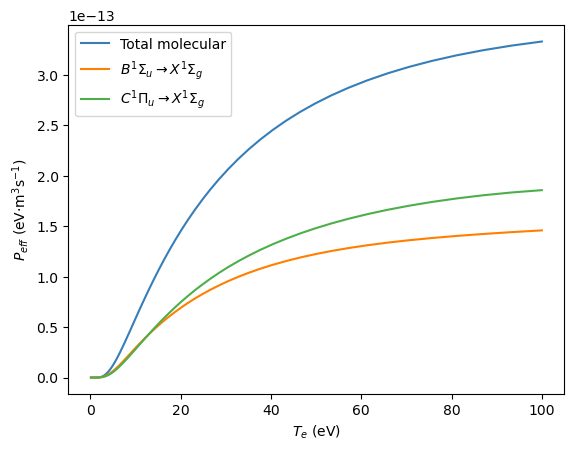

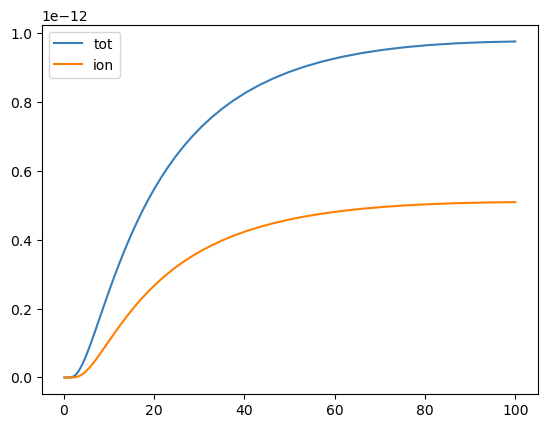

In [11]:
# Calculate total Peff
Xeff_B1 = fn.get_Xeff(crm,fv_H2,'B1Su','X1Sg',ne)
Xeff_C1 = fn.get_Xeff(crm,fv_H2,'C1Pu','X1Sg',ne)

Peff_B1 = np.zeros(len(Tev))
Peff_C1 = np.zeros(len(Tev))
Peff_Fulcher = np.zeros(len(Tev))
for i in range(len(Tev)):
    Peff_B1[i] = np.sum(Xeff_B1[i][:,0]*Xeff_B1[i][:,1])
    Peff_C1[i] = np.sum(Xeff_C1[i][:,0]*Xeff_C1[i][:,1])
    # Peff_Fulcher[i] = np.sum(Xeff_Fulcher[i][:,0]*Xeff_Fulcher[i][:,1])



states = ['X1Sg','B1Su','C1Pu','EF1Sg','a3Sg','c3Pu','d3Pu']

Peff = np.zeros(len(Tev))
for p in states: 
    for q in states:
        try:
           Xeff = fn.get_Xeff(crm,fv_H2,p,q,ne)
           for i in range(len(Tev)):
                Peff[i] += np.sum(Xeff[i][:,0]*Xeff[i][:,1])
        except:
            pass

A_tot = fn.eval_2D(X.reactions['AMJUEL']['H.10']['2.1.5'],Tev,ne)
A_ion = 13.6*fn.eval_2D(X.reactions['AMJUEL']['H.4']['2.1.5'],Tev,ne)
A = A_tot-A_ion

plt.plot(Tev,Peff, label='Total molecular')
plt.plot(Tev,Peff_B1, label=r'$B^1\Sigma_u \rightarrow X^1\Sigma_g$')
plt.plot(Tev,Peff_C1, label=r'$C^1\Pi_u \rightarrow X^1\Sigma_g$')
# plt.plot(Tev, A, label='Atomic (AMJUEL)')
# plt.ylim(1e-17,1e-6)
plt.xlabel(r'$T_e$ (eV)')
plt.ylabel(r'$P_{eff}$ (eV$\cdot$m$^3$s$^{-1}$)')
plt.legend()


plt.figure()
plt.plot(Tev, A_tot, label='tot')
plt.plot(Tev, A_ion, label='ion')
plt.legend()

In [ ]:
T = 10**np.linspace(np.log10(0.1),np.log10(100),100)
n = 10**np.linspace(17,21,5)
f = fn.vibr_dist(crm,T,n)


Text(0, 0.5, 'Q (eV per Fulcher photon)')

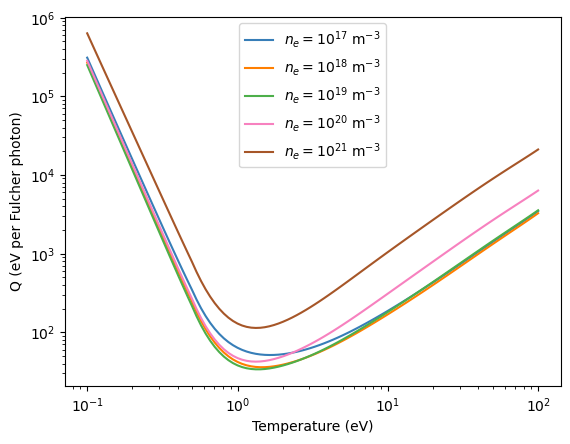

In [ ]:
fac = np.zeros((len(n),len(T)))

for i in range(len(n)):
    Xeff = fn.get_Xeff(crm,f[:,:,i],'d3Pu', 'a3Sg', n[i])
    states = ['X1Sg','B1Su','C1Pu','EF1Sg','a3Sg','c3Pu','d3Pu']

    Peff = np.zeros(len(T))
    for p in states: 
        for q in states:
            try:
                Xeff = fn.get_Xeff(crm,f[:,:,i],p,q,n[i])
                for j in range(len(Tev)):
                        Peff[j] += np.sum(Xeff[j][:,0]*Xeff[j][:,1])
            except:
                pass
    for j in range(len(T)):
         fac[i,j] = Peff[j]/np.sum(Xeff[j][:,1])
    


# p_low = np.zeros(len(Tev))
# p_high = np.zeros(len(Tev))

# for i in range(len(Tev)):
#     Peff_low = np.sum(Xeff_low[i][:,0]*Xeff_low[i][:,1])
#     # Peff_high = np.sum(Xeff_high[i][:,0]*Xeff_high[i][:,1])

#     X_sum_low = np.sum(Xeff_low[i][:,1])
#     # X_sum_high = np.sum(Xeff_high[i][:,1])

#     p_low[i] = Peff[i]/X_sum_low
#     # p_high[i] = Peff_low/X_sum_high
for i in range(len(n)):
    plt.loglog(T,fac[i,:],label=r'$n_e = 10^{%i}$ m$^{-3}$' %int(np.log10(n[i])))
plt.legend()
plt.xlabel('Temperature (eV)')
plt.ylabel('Q (eV per Fulcher photon)')

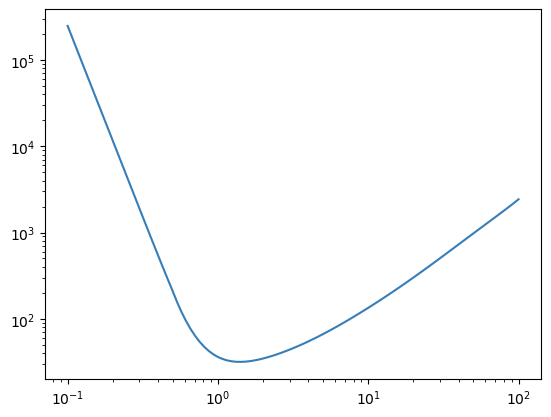

In [192]:
# Calculate power loss/number of Fulcher photons
Xeff_low = fn.get_Xeff(crm,fv_H2,'d3Pu', 'a3Sg', ne)
# Xeff_high = fn.get_Xeff(crm, fv_H2[:,:,9],'d3Pu', 'a3Sg', ne[5])

p_low = np.zeros(len(Tev))
p_high = np.zeros(len(Tev))

for i in range(len(Tev)):
    Peff_low = np.sum(Xeff_low[i][:,0]*Xeff_low[i][:,1])
    # Peff_high = np.sum(Xeff_high[i][:,0]*Xeff_high[i][:,1])

    X_sum_low = np.sum(Xeff_low[i][:,1])
    # X_sum_high = np.sum(Xeff_high[i][:,1])

    p_low[i] = Peff[i]/X_sum_low
    # p_high[i] = Peff_low/X_sum_high

plt.loglog(Tev,p_low)
# plt.loglog(Tev, p_hig

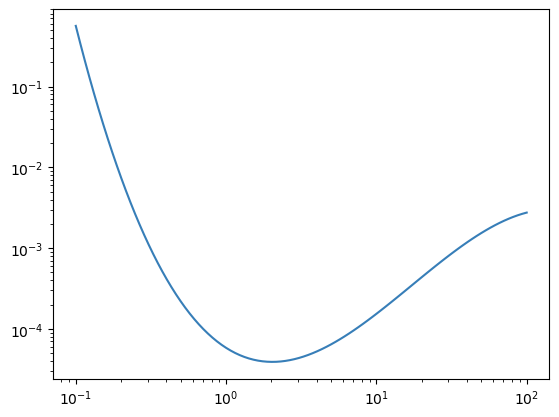

In [181]:
x = np.log(Tev)
y = np.log(p_low)
fit = np.flip(np.polyfit(x,y,3))
p2 = fn.eval_1D(fit,Tev)
plt.loglog(Tev,p2)


Text(0.5, 1.0, '$T_e=3.3$ eV')

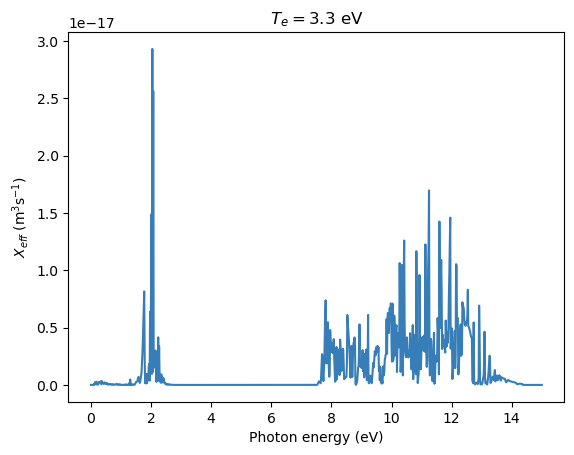

In [190]:
E = np.linspace(0,15,1000)
spec = np.zeros((len(Tev),len(E)))

for p in states: 
    for q in states:
        try:
           Xeff = fn.get_Xeff(crm,fv_H2,p,q,ne)
        except:
            pass
        for i in range(len(Tev)):
            o = interpolate.interp1d(Xeff[i][:,0],Xeff[i][:,1],bounds_error=False,fill_value = (0,0))
            spec[i,:] += o(E)

i=50
plt.plot(E,spec[i,:])
plt.xlabel('Photon energy (eV)');
plt.ylabel(r'$X_{eff}$ (m$^3$s$^{-1}$)');
plt.title(r'$T_e=%1.1f$ eV'%Tev[i])

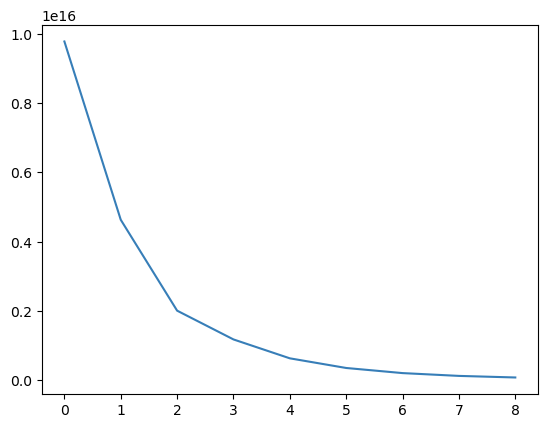

In [ ]:
Es = np.array([0.015,0.530,1.106,1.474,1.903,2.304,2.677,3.022,3.336])
kb = 1.38e-23
e = 1.602e-19
Ts = 8000

s = np.zeros(9)
for i in range(len(Es)):
#     crm.source[min(indx_X1)+i] = 1e16*np.exp(-Es[i]*e/(kb*Ts))
     s[i] = 1e16*np.exp(-Es[i]*e/(kb*Ts))

plt.plot(s)


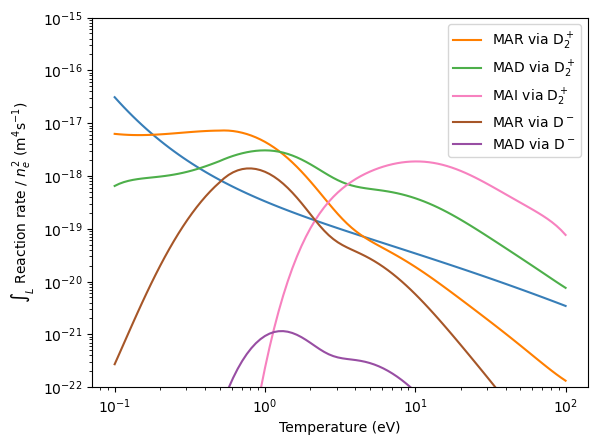

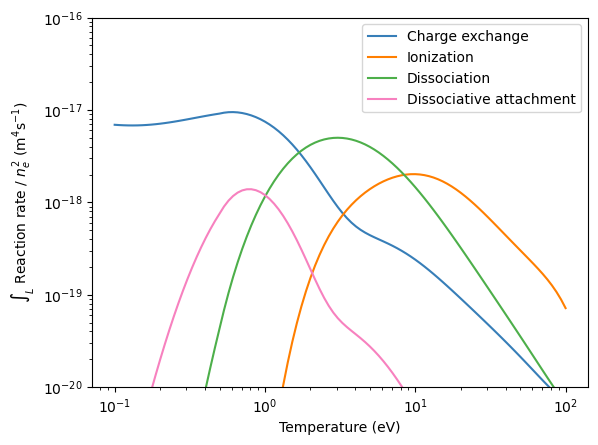

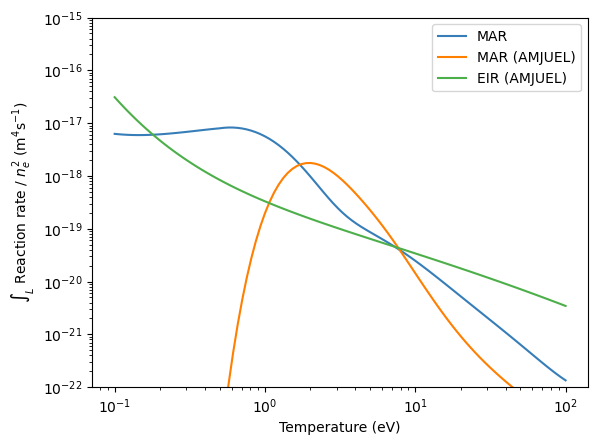

In [13]:
# Reacte absolute reaction rate plots using n_D2(Te) estimation (from MAST-U)
L=5
f_D2 = 10**(-1.176-2.3075*np.log10(Tev))
L = 10**-0.2609
plt.loglog(Tev,fn.eval_2D(X.reactions['AMJUEL']['H.4']['2.1.8'],Tev,ne)*L)
plt.loglog(Tev,MAR*f_D2,label=r'MAR via D$_2^+$')
plt.loglog(Tev,MAD*f_D2,label=r'MAD via D$_2^+$')
plt.loglog(Tev,MAI*f_D2,label=r'MAI via D$_2^+$')
plt.loglog(Tev,MAR_Hmin*f_D2,label=r'MAR via D$^-$')
plt.loglog(Tev,MAD_Hmin*f_D2,label=r'MAD via D$^-$')
plt.ylim(1e-22,1e-15)
plt.ylabel(r'$\int_L$ Reaction rate / $n_e^2$ (m$^{4}$s$^{-1}$)')
plt.xlabel('Temperature (eV)')
plt.legend()

plt.figure()
plt.loglog(Tev,r_cx*f_D2,label='Charge exchange')
plt.loglog(Tev,r_ion*f_D2,label='Ionization')
plt.loglog(Tev,r_diss*f_D2,label='Dissociation')
plt.loglog(Tev,r_DA*f_D2, label='Dissociative attachment')
plt.ylim(1e-20,1e-16)
plt.ylabel(r'$\int_L$ Reaction rate / $n_e^2$ (m$^{4}$s$^{-1}$)')
plt.xlabel('Temperature (eV)')
plt.legend()

plt.figure()
plt.loglog(Tev,(MAR+MAR_Hmin)*f_D2,label='MAR')
plt.loglog(Tev, MAR_a*f_D2, label='MAR (AMJUEL)')
plt.loglog(Tev,fn.eval_2D(X.reactions['AMJUEL']['H.4']['2.1.8'],Tev,ne)*L, label ='EIR (AMJUEL)')
plt.ylim(1e-22,1e-15)
plt.ylabel(r'$\int_L$ Reaction rate / $n_e^2$ (m$^{4}$s$^{-1}$)')
plt.xlabel('Temperature (eV)')
plt.legend()


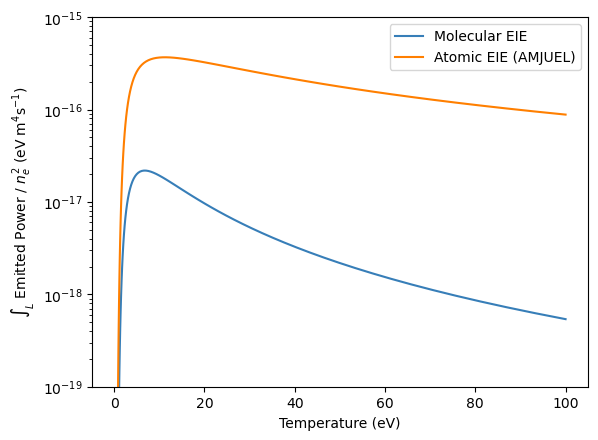

In [14]:
e = 1.602e-19
f_D = 10**(-1.4721-1.126*np.log10(Tev))
plt.plot(Tev, Peff*f_D2, label = 'Molecular EIE')
# plt.plot(Tev, Peff_B1*f_D2, label = r'$B^1\Sigma_u \rightarrow X^1\Sigma_g$')
# plt.plot(Tev, Peff_C1*f_D2, label = r'$C^1\Pi_u \rightarrow X^1\Sigma_g$')
plt.plot(Tev,A*f_D, label='Atomic EIE (AMJUEL)')
plt.xlabel('Temperature (eV)')
plt.ylabel(r'$\int_L$ Emitted Power / $n_e^2$ (eV m$^{4}$s$^{-1}$)');
plt.yscale('log')
plt.ylim(1e-19,1e-15)
plt.legend()

In [20]:
i=16
print(Tev[i])
print(Peff[i]*f_D2[i]/(A[i]*f_D[i]))

0.30538555088334157
0.6676540942610238


## Checking if there are enough states to accurately take DA into account. 

In [ ]:
np.shape(r_DA)

(100,)

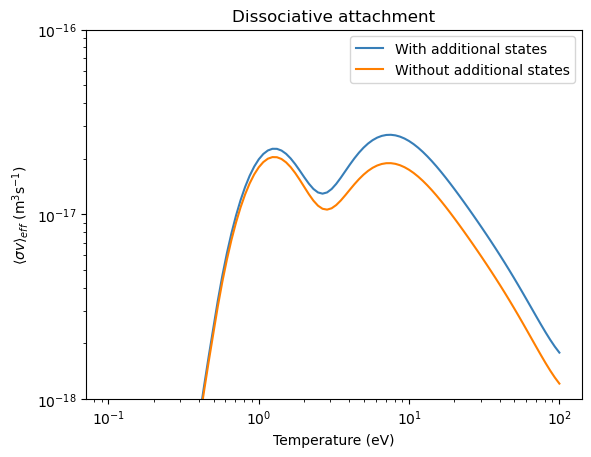

In [17]:
vmax = 20
vmax_B1 = 49
npoints = 4

E = fn.get_energies('X1Sg', vmax = vmax)
E_B1 = fn.get_energies('B1Su',vmax=49)
# plt.plot(E[1:15],fv_H2[indx_X1,50],'o')
# plt.yscale('log')


x = E[max(indx_X1)-(npoints-2):max(indx_X1)+2]
x_B1 = E_B1[14-(npoints-1):14+1]

f_ext = np.zeros((vmax+1,len(Tev)))
f_ext_B1 = np.zeros((vmax_B1+1,len(Tev)))
for i in range(len(Tev)):
    y = np.log(fv_H2[indx_X1,i][-4:])
    y_B1 = np.log(fv_H2[indx_B1,i][-4:])


    fit  = np.polyfit(x,y,1)
    fit_B1 = np.polyfit(x_B1,y_B1,1)

    for j in range(15,vmax+1):
        f_ext[j,i] = np.exp(fit[0]*E[j]+fit[1])
    for j in range(15,vmax_B1+1):
        f_ext_B1[j,i] = np.exp(fit[0]*E_B1[j]+fit[1])



f_ext[:15,:] = fv_H2[indx_X1,:]
# f_ext[0,:] = 1

f_ext_B1[:15,:] = fv_H2[indx_B1,:]

X=CRUMPET.ratedata.RateData(rates={'H2VIBR' : '/rates/h2vibr_custom.tex'})

vibr_res = np.zeros([vmax+1,len(Tev)])
for i in range(vmax+1):
    vibr_res[i,:] = fn.eval_1D(X.reactions['H2VIBR']['H.2']['2.'+str(i)+'L4'],Tev)

vibr_res_B1 = np.zeros([vmax_B1+1,len(Tev)])
for i in range(vmax_B1+1):
    vibr_res_B1[i,:] = fn.eval_1D(X.reactions['H2VIBR']['H.2']['2.'+str(i)+'Z4'],Tev)

eff_mol_DA = np.sum(vibr_res*f_ext,axis = 0)+np.sum(vibr_res_B1[:15,:]*fv_H2[indx_B1], axis=0)
eff_mol_DA_B1 = np.sum(vibr_res*f_ext,axis = 0)+np.sum(vibr_res_B1*f_ext_B1, axis=0)

# plt.loglog(Tev,eff_mol_DA,label = 'vmax = 20')
plt.loglog(Tev,eff_mol_DA_B1,label = 'With additional states')
plt.plot(Tev,r_DA,label = 'Without additional states')
plt.title('Dissociative attachment')
plt.xlabel('Temperature (eV)')
plt.ylabel(r'$\langle \sigma v \rangle_{eff}$ (m$^3$s$^{-1}$)')
plt.ylim(1e-18,1e-16)
plt.legend()





## Transport calculations and time scales 

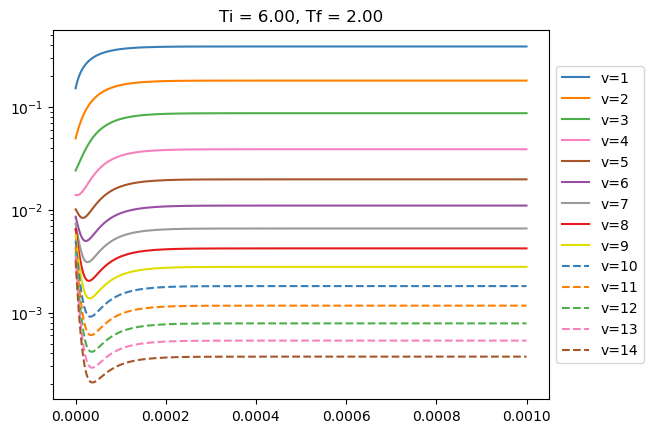

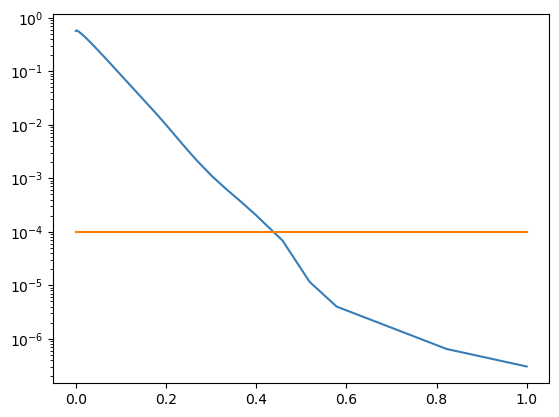

In [28]:
# Transport calculations

ne_t = 1e19
Tev_t = np.linspace(1,100,100)
i_init = 5
i_fin = 1
tau = 1e-3
delta = 1e-4

Tin = Tev_t[i_init]
Tf = Tev_t[i_fin]

f_in = crm.steady_state(Tin, ne_t/1e6, Ti=Tin/2, plot=False, dt=True)
f_s = crm.steady_state(Tf, ne_t/1e6, Ti=Tf/2, plot=False, dt=True)

crm.source[:]=0
sol = crm.solve_crm(tau,Tf,ne_t/1e6,Ti=Tf/2, gl=False, n=f_in, densonly = True, Qres=True)
t = sol.t
f_fin = sol.y

for i in range(14):
    plt.plot(t,np.transpose(f_fin[i]), label = 'v='+str(i+1))

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.yscale('log')
# plt.xscale('log')
plt.title(f'Ti = %1.2f, Tf = %1.2f' %(Tin,Tf))

tol = np.zeros(len(t))
for i in range(len(t)):
    tol[i] = abs((np.sum(f_s)-np.sum(f_fin[:,i]))/np.sum(f_s))
plt.figure()
plt.plot(t*1e3,tol)
plt.plot(t*1e3,np.ones(len(t))*delta)
# plt.xscale('log')
plt.yscale('log')



0.0007410108562269463
0.00031035189037800055
0.00018121073111344868
0.00011650655729402435
9.157299985757656e-05
6.90030014525176e-05
5.525707826566819e-05
4.872522909323862e-05
4.033553478607364e-05
3.866964940705754e-05
3.209204452104452e-05
2.9807008189060034e-05
2.6571779318377904e-05
2.3057289601776357e-05
2.2939226018401167e-05
2.0577745413833722e-05
2.009158569816009e-05
2.0231448997487255e-05
1.9437401549661852e-05
1.7204596594642273e-05
1.567516136855336e-05
1.565385542603193e-05
1.5646160569449947e-05
1.5638114804337947e-05
1.4390875061991116e-05
1.4365538533349295e-05
1.4045714749731645e-05
1.3979557269129296e-05
1.3901215429365852e-05
1.3786363033060536e-05
1.3667788459249614e-05
1.3562106107313433e-05
1.3467536050658394e-05
1.2744149565648512e-05
1.2722469784484854e-05
1.2705709672753935e-05
1.2022587470443644e-05
1.1981705329294883e-05
1.1945172850941871e-05
1.1911768652686309e-05
1.1869730787121935e-05
1.1830955856741357e-05
1.1060313954426432e-05
1.101802799130258e-05
1

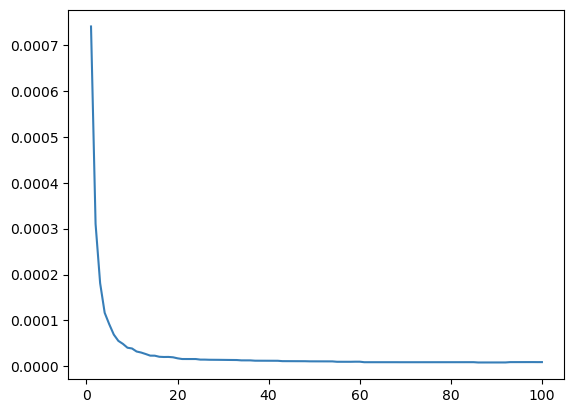

In [29]:
# teq as a function of initial temperature
ne_t = 1e19
Tev_t = np.linspace(1,100,100)
i_init = [0,0]
i_fin = np.arange(0,len(Tev_t))
tau = 1e-3
delta = 1e-3

Tin = Tev_t[i_init]
Tf = Tev_t[i_fin]

f_in = crm.steady_state(Tin[0], ne_t/1e6, Ti=Tin[0]/2, plot=False, dt=True)
# cx_s = r_cx[i_fin]

teq = np.zeros(len(Tev_t))
for j in range(len(Tev_t)):
    f_s = crm.steady_state(Tf[j], ne_t/1e6, Ti=Tf[j]/2, plot=False, dt=True)

    crm.source[:]=0
    sol = crm.solve_crm(tau,Tf[j],ne_t/1e6,Ti=Tf[j]/2, gl=False, densonly = True, Qres=False)
    t = sol.t
    f_fin = sol.y


    i=1
    tol=0
    try: 
        while tol<delta:
            tol = abs((np.sum(f_s)-np.sum(f_fin[:,-i]))/np.sum(f_s))
            teq[j]=t[-i]
            i+=1
    except IndexError:
        teq[j] = 0
            
    print(teq[j])

plt.plot(Tev_t, teq)


In [ ]:
n = 10**np.linspace(np.log10(1e17), np.log10(1e22),10)
T = np.array([1,5,10,20,50,100])

teq = np.zeros((len(T), len(n)))
for i in range(len(T)):
    for j in range(len(n)):
        teq[i,j]=fn.get_teq(crm,T[i],n[j],tau=1e-1)


Text(0.5, 0, '$n_e$ (m$^{-3})$')

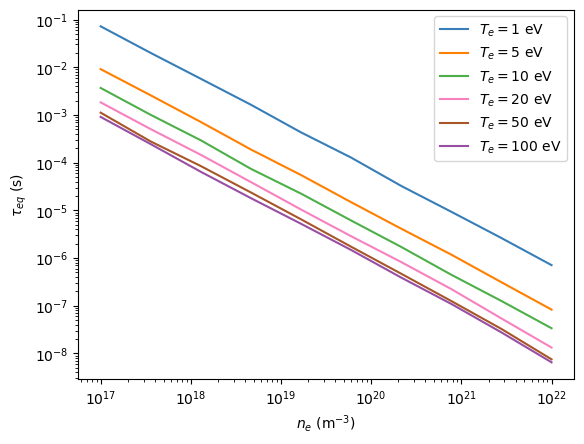

In [ ]:
for i in range(len(T)):
    plt.loglog(n,teq[i,:],label=r'$T_e=$'+str(T[i])+' eV')
# plt.yscale('log')
plt.legend()
plt.ylabel(r'$\tau_{eq}$ (s)')
plt.xlabel(r'$n_e$ (m$^{-3})$')


In [ ]:
fn.get_teq(crm,0.2,1e19,1e-2)

0.007242753392079885

In [30]:
fit = np.polyfit(1/n,teq[0,:],1)
print(fit)
plt.plot(n,teq[0,:])
plt.plot(n,fit[0]/n, '--')

T = 10**np.linspace(np.log10(1),np.log10(100),100)

teq2 = np.zeros(len(T))
for i in range(len(T)):
    teq2[i] = fn.get_teq(crm,T[i],1e19,1e-3)


NameError: name 'n' is not defined

[ 2.85915703e-04  6.08815515e-04 -1.03720859e-05]


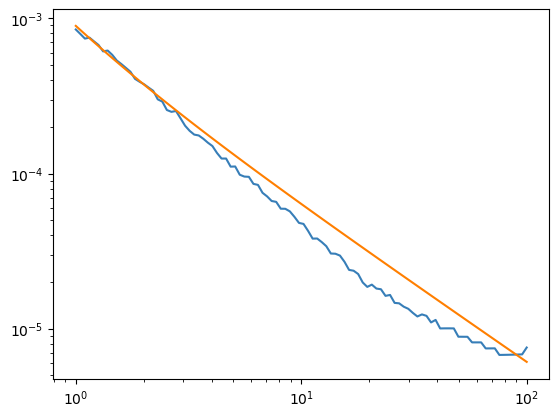

In [ ]:

plt.figure()
fit = np.polyfit(1/T,teq2,2)
plt.loglog(T,teq2)
plt.plot(T,fit[0]/T**2+fit[1]/T, fit[2])
print(fit)

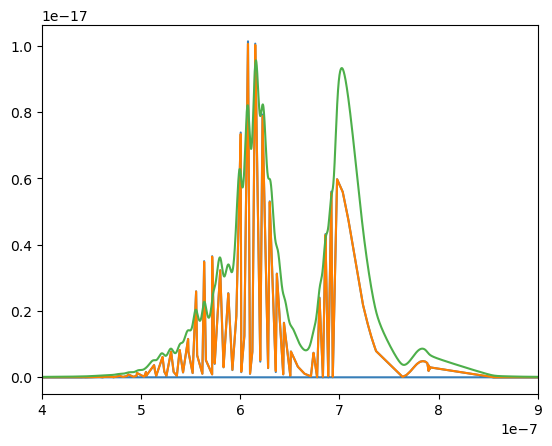

In [ ]:
i=99
h = 6.626e-34
c = 3e8
e = 1.602e-19

# plt.plot(Xeff[99][:,0], Xeff[99][:,1])
E = Xeff[i][:,0]
wavelength = h*c/(e*E)
plt.plot(wavelength, Xeff[i][:,1])
plt.xlim(400e-9, 900e-9)


o = interpolate.interp1d(wavelength,Xeff[i][:,1])
l = np.linspace(400e-9,900e-9, 10000)
s = o(l)
plt.plot(l,s)

def loren(x,x0,fwhm):
    a=fwhm/(2*np.pi)
    y=a*1/((x-x0)**2+(fwhm/2)**2)
    return y


lor = loren(l-650e-9,0,0.06e-7)

output = np.convolve(lor,s, mode='same')/1e10
plt.plot(l,output)


0.9923609293419741

  b0 -2.293005074060D+01  b1  1.118650452293D+00  b2 -1.035470610285D+00
  b3  2.953061955875D-01  b4  2.295561921434D-01  b5 -8.247426624730D-02
  b6 -1.460660456666D-02  b7  8.181379719686D-03  b8 -7.955155289295D-04

  b0 -2.297131452193D+01  b1  1.743731772608D+00  b2 -1.705570156779D+00
  b3  1.113160591700D-02  b4  3.135058128309D-01  b5 -2.998804826505D-02
  b6 -2.320644097464D-02  b7  5.229401828635D-03  b8 -2.841179579195D-04



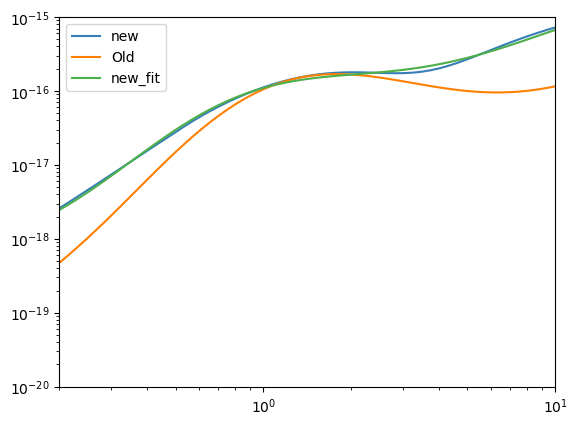

In [ ]:
vibr_resolved_CX = np.zeros([15,np.shape(fv_H2)[1]])
X = CRUMPET.ratedata.RateData(rates={'H2VIBR' : '/rates/h2vibr_custom.tex', 'AMJUEL' : '/rates/amjuel_altered.tex'})

for i in range(0,15):
        vibr_resolved_CX[i,:] = fn.eval_1D(X.reactions['H2VIBR']['H.2']['2.'+str(i)+'Q6'],Tiv)

fv = np.zeros((np.shape(fv_H2)[0]+1,np.shape(fv_H2)[1]))
# fv=fv_H2
for i in range(np.shape(fv_H2)[1]):
        fv[:,i] = np.append(1,fv_H2[:,i])

for i in range(np.shape(fv)[1]):
        fv[:,i] = fv[:,i]/np.sum(fv[:15,i])

eff_cx = np.sum(vibr_resolved_CX*fv[:15], axis=0)
eff_cx_incl = fn.eval_1D(X.reactions['AMJUEL']['H.2']['3.2.3D'], Tev)
plt.loglog(Tev,eff_cx, label='new')
plt.loglog(Tev,eff_cx_incl,label='Old')
plt.xlim(0.2,10)
plt.ylim(1e-20,1e-15)

x = np.log(Tev)
y = np.log(eff_cx/1e-6)
coeff = np.flip(np.polyfit(x,y,8))

test = fn.eval_1D(coeff,Tev)
plt.plot(Tev,test, label='new_fit')
plt.legend()

print(fn.block_string(coeff))
print(fn.block_string(X.reactions['AMJUEL']['H.2']['3.2.3D']))


In [36]:
Tev[50]

NameError: name 'Tev' is not defined

In [39]:
t = 10**np.linspace(-5,-3,5)
cx_t=np.zeros((len(t),len(Tev)))


cx_t_tau = np.zeros(len(Tev))
for j,tau in enumerate(t):
    for i in range(len(Tev)):
        # fv = np.append(1,fv_H2[indx_X1,i])
        # cx_t[i] = np.sum(fv*vibr_resolved_CX[:,0])
        fv_tau = np.append(1,crm.solve_crm(tau, Tev[0],ne/1e6,Ti=Tiv[0],gl=False,n=fv_H2[1:,i], densonly=True).y[indx_X1[:-1],-1])
        cx_t[j,i] = np.sum(fv_tau*vibr_resolved_CX[:,0])

# plt.loglog(Tev,cx_t_tau/r_cx[0])

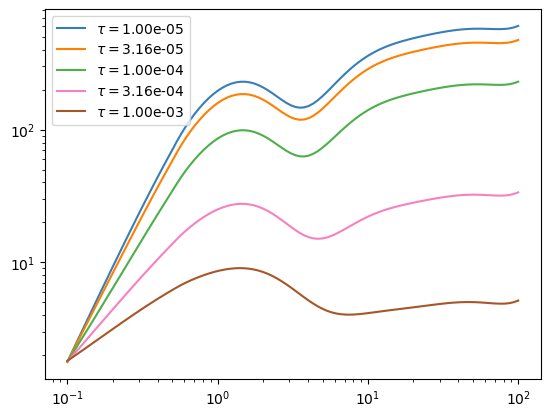

In [40]:

for i in range(len(t)):
    plt.loglog(Tev,cx_t[i]/r_cx[0], label = r'$\tau=$'+f'%1.2e' %t[i])
plt.legend()

In [79]:
ne

1e+19

In [80]:
cx,diss,ion,DA=fn.eff_rates(fv_H2,Tev)
teq = np.zeros(len(Tev))
for i in range(len(Tev)):
    teq[i] = fn.get_teq(crm,Tev[i],ne,1e-1)

[  6.13590727   6.57933225   7.05480231   7.56463328   8.11130831
   8.69749003   9.32603347  10.          10.72267222  11.49756995
  12.32846739  13.21941148  14.17474163  15.19911083  16.29750835
  17.475284    18.73817423  20.09233003  21.5443469   23.101297
  24.77076356  26.56087783  28.48035868  30.53855509  32.74549163
  35.11191734  37.64935807  40.37017259  43.28761281  46.41588834
  49.77023564  53.36699231  57.22367659  61.35907273  65.79332247
  70.54802311  75.64633276  81.11308308  86.97490026  93.26033469
 100.        ]
2.0429226817590145e-05


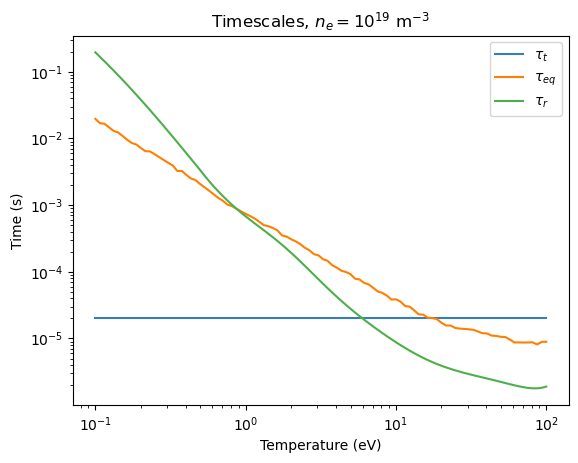

In [84]:
m = 2*3.343e-27
E = 0.5*1.602e-19
l=0.1
tau_t = l/np.sqrt(2*E/m)
plt.plot(Tev,np.ones(len(Tev))*tau_t, label=r'$\tau_t$')
plt.loglog(Tev,teq, label=r'$\tau_{eq}$')
plt.loglog(Tev,1/(ne*(cx+diss+ion+DA)), label=r'$\tau_r$')
plt.xlabel('Temperature (eV)')
plt.ylabel('Time (s)')
plt.legend()
plt.title(r'Timescales, $n_e=10^{19}$ m$^{-3}$')

print(Tev[1/(ne*(cx+diss+ion+DA))<tau_t])
print(tau_t)



In [41]:
Tin =5 #Initial Temperature
ne = 1e19
indx_mol = np.arange(0,105)

# Calculate effective rates at Tin
fv = np.transpose([np.append(1,crm.steady_state(Tin,ne/1e6,Ti = Tin/2, plot=False))])
fv = fv/np.sum(fv[indx_mol,0])
cx_i,diss_i,ion_i,da_i = fn.eff_rates(fv,Tin)

# Calculate residence time
tau_r=1/(ne*(cx_i+da_i+diss_i+ion_i))
tau_r=tau_r[0]
# tau_r=0

# # Use residence time, kinetic energy and temperature gradient to calculate temperatures
del_T = (5-0.2)/0.4
m = 2*3.343e-27
E = 0.5*1.602e-19
dl = np.sqrt(2*E/m)*tau_r


# Tf = Tin-del_T*dl # Final temperature
Tf = 1

# Calculate steady-state solution with Tf
fv_fin = np.transpose([np.append(1,crm.steady_state(Tf,ne/1e6,Ti = Tf/2, plot=False))])
fv_fin = fv_fin/np.sum(fv_fin[indx_mol,0])

cx,diss,ion,da,vibr_resolved_CX, vibr_resolved_Diss, vibr_resolved_Ion, vibr_resolved_DA, vibr_resolved_DA_B1 = fn.eff_rates(fv_fin,Tf,get_vibr_res=True)
tau_r_f=1/(ne*(cx+da+diss+ion))

# Calculate final distribution using residence time and temperatures
fv_tau = np.append(1,crm.solve_crm(0, Tf,ne/1e6,Ti=Tf/2,gl=False,n=fv[1:,0], densonly=True).y[:,-1])
fv_tau = fv_tau/np.sum(fv_tau[indx_mol])


cx_t = np.sum(fv_tau[:15]*vibr_resolved_CX[:,0])
fac = cx_t/cx
teq = fn.get_teq(crm,Tf,ne,1e-1)



print('Ti = %1.2f eV, Tf = %1.2f eV' %(Tin,Tf))
# print('t_r(Ti) = %1.2e s' %tau_r)
print('t_r(Tf) = %1.2e s' %tau_r_f)
print('t_eq = %1.2e s' %teq)
print('Factor = %1.5f' %fac)
print('dl = %1.2f cm' %(dl*100))


Ti = 5.00 eV, Tf = 1.00 eV
t_r(Tf) = 6.79e-04 s
t_eq = 7.41e-04 s
Factor = 0.75144
dl = 13.58 cm


In [85]:
# Ti = 10**np.linspace(np.log10(0.1),np.log10(100),10)
Ti = 6
Tf = 10**np.linspace(-1,np.log10(6),100)
n = 1e19
tau = 10**np.linspace(-5,-3,5)

# Calculate final steady state distribution
# fv_f = crm.steady_state(Tf,n/1e6,Ti=Tf/2)
# fv_f = np.append(1,fv_f)
# fv_f = fv_f/np.sum(fv_f[indx_mol])
# fv_f = np.transpose(np.array([fv_f]))
# cx_f,diss_f,ion_f,da_f, vibr_resolved_CX, vibr_resolved_Diss, vibr_resolved_Ion, vibr_resolved_DA, vibr_resolved_DA_B1 =fn.eff_rates(fv_f,Tf,get_vibr_res=True)
# fv_f = fv_f.reshape(107)

# Calculate initial steady state distribution
fv_i = crm.steady_state(Ti,n/1e6,Ti=Ti/2)

cx_tau = np.zeros((len(Tf),len(tau)))
for i in range(len(Tf)):
    # Calculate final steady state distribution
    fv_f = crm.steady_state(Tf[i],n/1e6,Ti=Tf[i]/2)
    fv_f = np.append(1,fv_f)
    fv_f = fv_f/np.sum(fv_f[indx_mol])
    fv_f = np.transpose(np.array([fv_f]))
    cx_f,diss_f,ion_f,da_f, vibr_resolved_CX, vibr_resolved_Diss, vibr_resolved_Ion, vibr_resolved_DA, vibr_resolved_DA_B1 =fn.eff_rates(fv_f,Tf[i],get_vibr_res=True)
    fv_f = fv_f.reshape(107)

    # Calculate the distribution after time tau
    for j in range(len(tau)):
        fv_tau = crm.solve_crm(tau[j],Tf[i],n/1e6,Ti=Tf[i]/2,gl=False,densonly=True,n=fv_i).y[:,-1]

        fv_tau = np.append(1,fv_tau)
        fv_tau = fv_tau/np.sum(fv_tau[indx_mol])

        # cx_f = np.sum(fv_f[indx_X1]*vibr_resolved_CX[:,0])
        # fv_i = np.append(1,fv_i)
        # fv_i = fv_i/np.sum(fv_i[indx_mol])

        # cx_i = np.sum(fv_i[indx_X1]*vibr_resolved_CX[:,0])
        cx_tau[i,j] = np.sum(fv_tau[indx_X1]*vibr_resolved_CX[:,0])/cx_f[0]



Text(0, 0.5, '$\\frac{\\langle\\sigma v\\rangle_{t}}{\\langle\\sigma v\\rangle_{eff}}$            ')

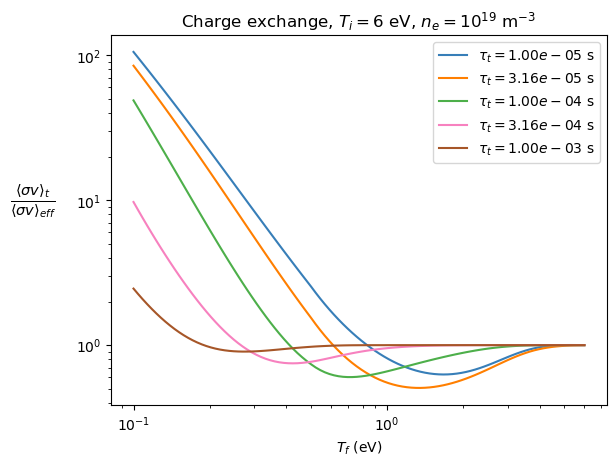

In [90]:
for i in range(len(cx_tau[0])):
    plt.loglog(Tf,cx_tau[:,i],label=r'$\tau_t= %1.2e$ s' %tau[i])
plt.legend()
plt.title(r'Charge exchange, $T_i=6$ eV, $n_e=10^{19}$ m$^{-3}$')
plt.xlabel(r'$T_f$ (eV)')
plt.ylabel(r'$\frac{\langle\sigma v\rangle_{t}}{\langle\sigma v\rangle_{eff}}$            ', rotation=0, size=15)


In [ ]:
Tin =np.linspace(3,6,100) #Initial Temperature
ne = 1e19
del_T = (5-0.2)/0.4
m = 2*3.343e-27
E = 0.5*1.602e-19

l=np.zeros(len(Tin))
fac=np.zeros(len(Tin))
for i in range(len(Tin)):
    # Calculate effective rates at Tin
    fv = np.transpose([crm.steady_state(Tin[i],ne/1e6,Ti = Tin[i]/2, plot=False)])
    
    cx_i,diss_i,ion_i,da_i= fn.eff_rates(fv,Tin[i])

    # Calculate residence time
    tau_r_i=1/(ne*(cx_i+da_i+diss_i+ion_i))
    tau_r_i=tau_r_i[0]

    # Use residence time, kinetic energy and temperature gradient to calculate temperatures
    dl = np.sqrt(2*E/m)*tau_r_i
    Tf = Tin[i]-del_T*dl # Final temperature
    # Tf = 0.1

    # Calculate steady-state solution with Tf
    fv_fin = np.transpose([crm.steady_state(Tf,ne/1e6,Ti = Tf/2, plot=False)])
    tau_r_f=1/(ne*(cx+da+diss+ion))
    cx,diss,ion,da,vibr_resolved_CX, vibr_resolved_Diss, vibr_resolved_Ion, vibr_resolved_DA, vibr_resolved_DA_B1 = fn.eff_rates(fv_fin,Tf,get_vibr_res=True)

    # Calculate final distribution using residence time and temperatures
    fv_tau = np.append(1,crm.solve_crm(tau_r_i, Tf,ne/1e6,Ti=Tf/2,gl=False,n=fv[:,0], densonly=True).y[indx_X1,-1])


    cx_t = np.sum(fv_tau*vibr_resolved_CX[:,0])
    fac[i] = cx_t/cx
    l[i]=dl

/home/kobussen/Documents/CRUMPET/CRUMPET/reactions.py:654: RuntimeWarning: invalid value encountered in log10
  x = log10(T)
/home/kobussen/Documents/Vibr_mod_effective_rates/Functions.py:665: RuntimeWarning: invalid value encountered in log
  o = o + coeff[i] * (np.log(T) ** i)


KeyboardInterrupt: 

## Plasma wall interactions

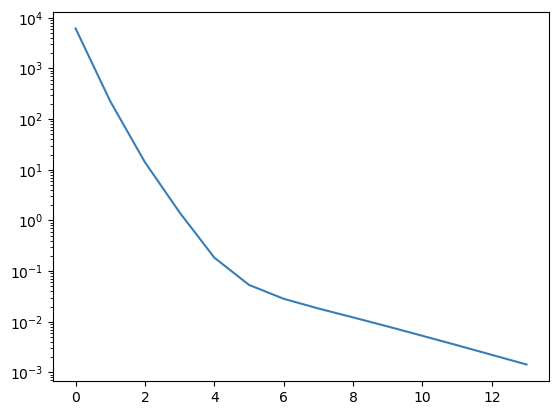

In [207]:
crm.source[:] = 0
plt.plot(crm.getM(1,1e13,Ti=0.5)[1][:14])
plt.yscale('log')
# crm.getM(1,1e13,Ti=0.5)[0]

In [221]:
crm.source[:] = 0
G0 = np.sum(crm.getM(1,1e13,Ti=0.5)[1][:104]) #(Approximate) influx of v=0 molecules without PWI
f0 = np.array([0.027099391,0.046572008,0.020608519,0.012494929,0.025314402,0.018985801,0.014117647,0.004543611,0.003894523])
G_in = G0/f0[0]*f0
print(G_in)
crm.source[:8] = G_in[1:]

test = fn.vibr_dist(crm,Tev,ne)

[ 6385.48399838 10973.85590165  4856.02677584  2944.20524765
  5964.88345069  4473.6624702   3326.56955329  1070.62019716
   917.6742864 ]


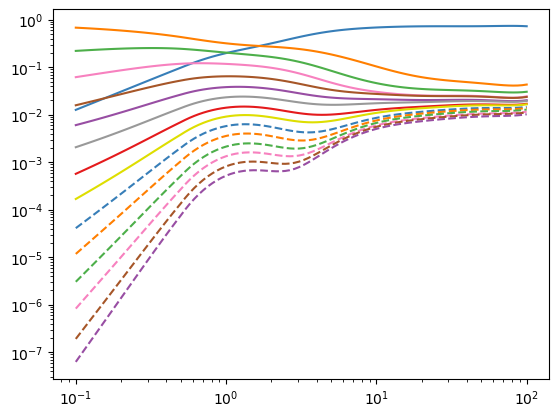

In [223]:
test = test.reshape(len(crm.species)+1,len(Tev))
plt.loglog(Tev,np.transpose(test[indx_X1]))

In [6]:
f_01 = np.array([0.198319328,0.090756303,0.028571429,0.005042017])
f_05 = np.array([0.218565401,0.102109705,0.054852321,0.011814346,0.004219409])
f_10 = np.array([0.188235294,0.100000000,0.076470588,0.034453782,0.015966387])
f_20 = np.array([0.129817444,0.127383367,0.095740365,0.032048682,0.019066937,0.014604462,0.006490872])
f_35 = np.array([0.027099391,0.046572008,0.020608519,0.012494929,0.025314402,0.018985801,0.014117647,0.004543611,0.003894523])

f = [f_01,f_05,f_10,f_20,f_35]
E = [0.1,0.5,1,2,3.5]


T = 10**np.linspace(np.log10(0.1),np.log10(10),100)
ne = 1e19

cx=np.zeros(len(T))
cx_pwi = np.zeros((len(f),len(T)))


for i in range(len(T)):
    crm.source[:] = 0
    x = np.append(1,crm.steady_state(T[i],ne/1e6,Ti=T[i]/2))
    x = np.transpose(np.array([x/np.sum(x)]))
    cx[i] = fn.eff_rates(x,1)[0][0]

    for j in range(len(f)):
        G0 = np.sum(crm.getM(T[i],ne/1e6,Ti=T[i]/2)[1][:104]) #(Approximate) influx of v=0 molecules without PWI
        f0 = f[j]
        G_in = G0/f0[0]*f0
        crm.source[:len(f0)-1] = G_in[1:]

        y = np.append(1,crm.steady_state(T[i],ne/1e6,Ti=T[i]/2))
        y = np.transpose(np.array([y/np.sum(y)]))
        cx_pwi[j,i] = fn.eff_rates(y,1)[0][0]

# print(cx_pwi)
# print(cx)


[[1.66190254e-18 1.84919120e-18 2.05755279e-18 2.28929938e-18
  2.54698416e-18 2.83342443e-18 3.15172627e-18 3.50531111e-18
  3.89794426e-18 4.33376531e-18 4.81732055e-18 5.35359733e-18
  5.94806035e-18 6.60668972e-18 7.33602073e-18 8.14318508e-18
  9.03595332e-18 1.00227781e-17 1.11128377e-17 1.23160796e-17
  1.36432626e-17 1.51059978e-17 1.67167859e-17 1.84890509e-17
  2.04371676e-17 2.25764812e-17 2.49233174e-17 2.74949786e-17
  3.03097231e-17 3.33867230e-17 3.67459932e-17 4.04082823e-17
  4.43949150e-17 4.87275664e-17 5.34279452e-17 5.86637325e-17
  6.44051222e-17 7.03680305e-17 7.65286494e-17 8.28599661e-17
  8.93314801e-17 9.59089111e-17 1.02553932e-16 1.09223965e-16
  1.15872087e-16 1.22447077e-16 1.28893635e-16 1.35152818e-16
  1.41162687e-16 1.46859180e-16 1.52179704e-16 1.57055773e-16
  1.61422435e-16 1.65222527e-16 1.68404280e-16 1.70922972e-16
  1.72742541e-16 1.73837121e-16 1.74192428e-16 1.73806964e-16
  1.72692984e-16 1.70877173e-16 1.68400975e-16 1.65320530e-16
  1.6170

Text(0.5, 1.0, 'Molecular charge exchange')

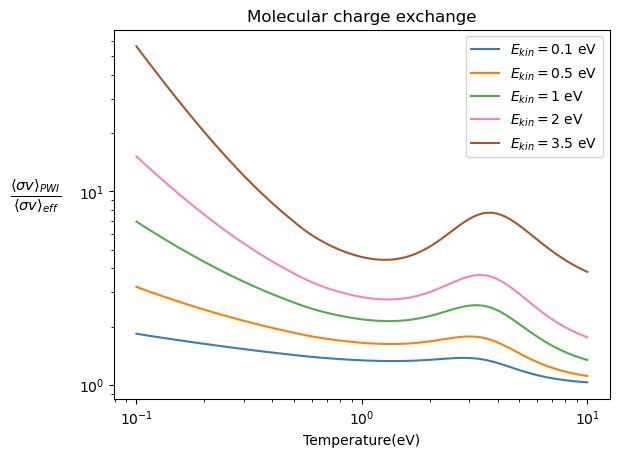

In [12]:
# plt.loglog(T,cx)
for i in range(cx_pwi.shape[0]):
    plt.loglog(T,cx_pwi[i]/cx, label = r'$E_{kin} =$'+str(E[i])+' eV');

plt.legend()
plt.xlabel('Temperature(eV)')
plt.ylabel(r'$\frac{\langle\sigma v\rangle_{PWI}}{\langle\sigma v\rangle_{eff}}$            ', rotation=0, size=15)
plt.title('Molecular charge exchange')

In [64]:
# Calculating residence time
T = 1
n = 1e19
indx_mol = np.arange(0,105)

crm.source[:]=0
fv = np.append(1,crm.steady_state(T,n/1e6,Ti = T/2, plot=False))
fv = np.transpose([fv/np.sum(fv[indx_mol])])

cx,diss,ion,da = fn.eff_rates(fv,T)
tau_r=1/(ne*(cx+da+diss+ion))[0]

m = 2*3.343e-27
E = 0.5*1.602e-19
dl = np.sqrt(2*E/m)*tau_r


print(tau_r)
print(fn.get_teq(crm,T,n,1e0))
print(100*dl)

0.0006792538751535582
0.0007410108485426096
332.49122995134667


Text(0, 0.5, '$\\langle \\sigma v \\rangle_\\nu$ (m$^3$s$^{-1}$)')

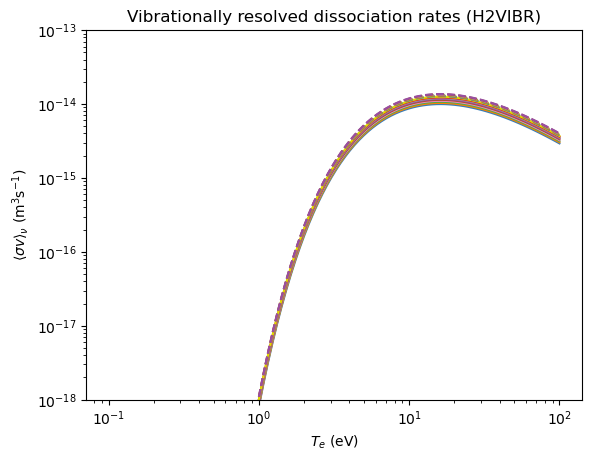

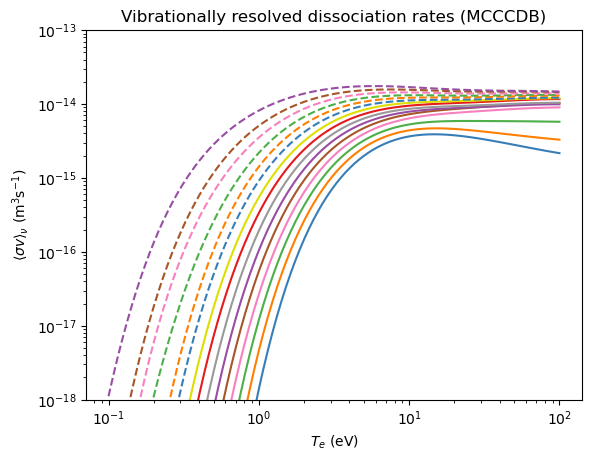

In [27]:
for i in range(15):
    plt.loglog(Tev, fn.eval_1D(X.reactions['H2VIBR']['H.2']['2.'+str(i)+'L1'],Tev))
plt.ylim(1e-18,1e-13)
plt.title('Vibrationally resolved dissociation rates (H2VIBR)')
plt.xlabel(r'$T_e$ (eV)')
plt.ylabel(r'$\langle \sigma v \rangle_\nu$ (m$^3$s$^{-1}$)')
plt.figure()
for i in range (15):
    plt.loglog(Tev,fn.eval_1D(crm.reactions['H2VIBR']['H.2']['2.'+str(i)+'l1'].coeffs,Tev))
plt.ylim(1e-18,1e-13)
plt.title('Vibrationally resolved dissociation rates (MCCCDB)')
plt.xlabel(r'$T_e$ (eV)')
plt.ylabel(r'$\langle \sigma v \rangle_\nu$ (m$^3$s$^{-1}$)')

In [61]:
r_cx

array([5.10118915e-19, 5.94934816e-19, 6.95172284e-19, 8.14030219e-19,
       9.55391993e-19, 1.12396958e-18, 1.32547683e-18, 1.56683713e-18,
       1.85643111e-18, 2.20439102e-18, 2.62294862e-18, 3.12684414e-18,
       3.73380368e-18, 4.46509254e-18, 5.34615067e-18, 6.40731526e-18,
       7.68463189e-18, 9.22075109e-18, 1.10658992e-17, 1.32788997e-17,
       1.59282012e-17, 1.90928342e-17, 2.28631616e-17, 2.73411858e-17,
       3.28544755e-17, 3.90849359e-17, 4.60281746e-17, 5.36873191e-17,
       6.20473175e-17, 7.10698745e-17, 8.06883006e-17, 9.08029142e-17,
       1.01277760e-16, 1.11939443e-16, 1.22581540e-16, 1.32956426e-16,
       1.42810305e-16, 1.51883425e-16, 1.59926223e-16, 1.66718175e-16,
       1.72088441e-16, 1.75937064e-16, 1.78255043e-16, 1.79141164e-16,
       1.78813163e-16, 1.77610828e-16, 1.75989241e-16, 1.74501489e-16,
       1.73771758e-16, 1.74461335e-16, 1.77231247e-16, 1.82705733e-16,
       1.91440279e-16, 2.03896854e-16, 2.20427485e-16, 2.41265997e-16,
      

In [74]:
x = np.log(Tev)
y = np.log(r_diss*1e6)
fit  = np.flip(np.polyfit(x,y,8))

# plt.loglog(Tev,r_cx)
# plt.plot(Tev,fn.eval_1D(fit, Tev),'--')

print(fn.block_string(fit))

def numpy_to_string(): 
    part_1 = "\subsection{\n" +\
                f"Reaction 2.2S1\n"+\
                f"$ e + D_2 \\rightarrow e + 2D$ (dissociation)\n" +\
                "}\n"+\
                "Rate coeff. for D2 at rest, calculated using CRM with Laporta/MCCCDB/Ichihara data\n"+\
                "Elecron density is $10^{19}m^{-3}$\n"+\
                "\\begin{small}\\begin{verbatim}\n"+\
                "\n"
                
    part_2 =   "\n"+\
                "\\end{verbatim}\end{small}\n"+\
                "\n"+\
                "\\newpage\n"
    return part_1, part_2

string = numpy_to_string()[0]+fn.block_string(fit)+numpy_to_string()[1]
print(string)

# with open('fits.dat','a') as f:
#     f.write(string)

  b0 -2.478839159309D+01  b1  5.491145403803D+00  b2 -2.040450942165D+00
  b3  2.917407477195D-01  b4  7.489139565814D-02  b5 -3.312466802884D-02
  b6 -3.595160653997D-03  b7  2.897974208230D-03  b8 -3.123895642559D-04

\subsection{
Reaction 2.2S1
$ e + D_2 \rightarrow e + 2D$ (dissociation)
}
Rate coeff. for D2 at rest, calculated using CRM with Laporta/MCCCDB/Ichihara data
Elecron density is $10^{19}m^{-3}$
\begin{small}\begin{verbatim}

  b0 -2.478839159309D+01  b1  5.491145403803D+00  b2 -2.040450942165D+00
  b3  2.917407477195D-01  b4  7.489139565814D-02  b5 -3.312466802884D-02
  b6 -3.595160653997D-03  b7  2.897974208230D-03  b8 -3.123895642559D-04

\end{verbatim}\end{small}

\newpage



## Investigating electronically excited states

In [47]:
# No excited states
fn.gen_input('input_no.dat', vibr_lap = True, ion = True, diss_att_X1=True, mol_cx=True, diss=True, rad_decay = True, coll_deex=True, MA=True, MA_min=True)
# Unresolved 
fn.gen_input('input_unr.dat', vibr_resolved=False, B1=True, ion=True,C1=True,vibr_lap=True,diss=True,diss_att_X1=True,mol_cx=True, coll_deex=True, MA=True, MA_min=True)
# No excited states above C1
fn.gen_input('input_exc.dat', vibr_lap = True, ion = True, B1=True, C1=True, incl_ground=False,
             diss_att_B1=True, diss_att_X1=True, mol_cx=True, diss=True, rad_decay = True, MA=True, MA_min=True)

In [48]:
crm_no =  CRUMPET.Crumpet('input_no.dat')
crm_unr = CRUMPET.Crumpet('input_new.dat')
crm_exc =  CRUMPET.Crumpet('input_exc.dat')

['H2VIBR', 'H.2', '2.0t0']
['H2VIBR', 'H.2', '2.0t1']
['H2VIBR', 'H.2', '2.0t2']
['H2VIBR', 'H.2', '2.0t3']
['H2VIBR', 'H.2', '2.0t4']
['H2VIBR', 'H.2', '2.0t5']
['H2VIBR', 'H.2', '2.0t6']
['H2VIBR', 'H.2', '2.0t7']
['H2VIBR', 'H.2', '2.0t8']
['H2VIBR', 'H.2', '2.0t9']
['H2VIBR', 'H.2', '2.0t10']
['H2VIBR', 'H.2', '2.0t11']
['H2VIBR', 'H.2', '2.0t12']
['H2VIBR', 'H.2', '2.0t13']
['H2VIBR', 'H.2', '2.0t14']
['H2VIBR', 'H.2', '2.1t0']
['H2VIBR', 'H.2', '2.1t1']
['H2VIBR', 'H.2', '2.1t2']
['H2VIBR', 'H.2', '2.1t3']
['H2VIBR', 'H.2', '2.1t4']
['H2VIBR', 'H.2', '2.1t5']
['H2VIBR', 'H.2', '2.1t6']
['H2VIBR', 'H.2', '2.1t7']
['H2VIBR', 'H.2', '2.1t8']
['H2VIBR', 'H.2', '2.1t9']
['H2VIBR', 'H.2', '2.1t10']
['H2VIBR', 'H.2', '2.1t11']
['H2VIBR', 'H.2', '2.1t12']
['H2VIBR', 'H.2', '2.1t13']
['H2VIBR', 'H.2', '2.1t14']
['H2VIBR', 'H.2', '2.2t0']
['H2VIBR', 'H.2', '2.2t1']
['H2VIBR', 'H.2', '2.2t2']
['H2VIBR', 'H.2', '2.2t3']
['H2VIBR', 'H.2', '2.2t4']
['H2VIBR', 'H.2', '2.2t5']
['H2VIBR', 'H.2', 

100%|██████████| 16/16 [00:00<00:00, 2435.89it/s]


Constructing functional emissivity matrix


100%|██████████| 16/16 [00:00<00:00, 2652.00it/s]


Constructing functional energy transfer matrix


100%|██████████| 16/16 [00:00<00:00, 2532.03it/s]


['H2VIBR', 'H.2', '2.0t0']
['H2VIBR', 'H.2', '2.0t1']
['H2VIBR', 'H.2', '2.0t2']
['H2VIBR', 'H.2', '2.0t3']
['H2VIBR', 'H.2', '2.0t4']
['H2VIBR', 'H.2', '2.0t5']
['H2VIBR', 'H.2', '2.0t6']
['H2VIBR', 'H.2', '2.0t7']
['H2VIBR', 'H.2', '2.0t8']
['H2VIBR', 'H.2', '2.0t9']
['H2VIBR', 'H.2', '2.0t10']
['H2VIBR', 'H.2', '2.0t11']
['H2VIBR', 'H.2', '2.0t12']
['H2VIBR', 'H.2', '2.0t13']
['H2VIBR', 'H.2', '2.0t14']
['H2VIBR', 'H.2', '2.1t0']
['H2VIBR', 'H.2', '2.1t1']
['H2VIBR', 'H.2', '2.1t2']
['H2VIBR', 'H.2', '2.1t3']
['H2VIBR', 'H.2', '2.1t4']
['H2VIBR', 'H.2', '2.1t5']
['H2VIBR', 'H.2', '2.1t6']
['H2VIBR', 'H.2', '2.1t7']
['H2VIBR', 'H.2', '2.1t8']
['H2VIBR', 'H.2', '2.1t9']
['H2VIBR', 'H.2', '2.1t10']
['H2VIBR', 'H.2', '2.1t11']
['H2VIBR', 'H.2', '2.1t12']
['H2VIBR', 'H.2', '2.1t13']
['H2VIBR', 'H.2', '2.1t14']
['H2VIBR', 'H.2', '2.2t0']
['H2VIBR', 'H.2', '2.2t1']
['H2VIBR', 'H.2', '2.2t2']
['H2VIBR', 'H.2', '2.2t3']
['H2VIBR', 'H.2', '2.2t4']
['H2VIBR', 'H.2', '2.2t5']
['H2VIBR', 'H.2', 

100%|██████████| 18/18 [00:00<00:00, 974.25it/s]


Constructing functional emissivity matrix


100%|██████████| 18/18 [00:00<00:00, 1138.40it/s]


Constructing functional energy transfer matrix


100%|██████████| 18/18 [00:00<00:00, 1029.95it/s]


['H2VIBR', 'H.2', '2.0t0']
['H2VIBR', 'H.2', '2.0t1']
['H2VIBR', 'H.2', '2.0t2']
['H2VIBR', 'H.2', '2.0t3']
['H2VIBR', 'H.2', '2.0t4']
['H2VIBR', 'H.2', '2.0t5']
['H2VIBR', 'H.2', '2.0t6']
['H2VIBR', 'H.2', '2.0t7']
['H2VIBR', 'H.2', '2.0t8']
['H2VIBR', 'H.2', '2.0t9']
['H2VIBR', 'H.2', '2.0t10']
['H2VIBR', 'H.2', '2.0t11']
['H2VIBR', 'H.2', '2.0t12']
['H2VIBR', 'H.2', '2.0t13']
['H2VIBR', 'H.2', '2.0t14']
['H2VIBR', 'H.2', '2.1t0']
['H2VIBR', 'H.2', '2.1t1']
['H2VIBR', 'H.2', '2.1t2']
['H2VIBR', 'H.2', '2.1t3']
['H2VIBR', 'H.2', '2.1t4']
['H2VIBR', 'H.2', '2.1t5']
['H2VIBR', 'H.2', '2.1t6']
['H2VIBR', 'H.2', '2.1t7']
['H2VIBR', 'H.2', '2.1t8']
['H2VIBR', 'H.2', '2.1t9']
['H2VIBR', 'H.2', '2.1t10']
['H2VIBR', 'H.2', '2.1t11']
['H2VIBR', 'H.2', '2.1t12']
['H2VIBR', 'H.2', '2.1t13']
['H2VIBR', 'H.2', '2.1t14']
['H2VIBR', 'H.2', '2.2t0']
['H2VIBR', 'H.2', '2.2t1']
['H2VIBR', 'H.2', '2.2t2']
['H2VIBR', 'H.2', '2.2t3']
['H2VIBR', 'H.2', '2.2t4']
['H2VIBR', 'H.2', '2.2t5']
['H2VIBR', 'H.2', 

100%|██████████| 46/46 [00:00<00:00, 141.34it/s]


Constructing functional emissivity matrix


100%|██████████| 46/46 [00:00<00:00, 163.22it/s]


Constructing functional energy transfer matrix


100%|██████████| 46/46 [00:00<00:00, 218.86it/s]


In [49]:
Tev = 10**np.linspace(np.log10(0.1),np.log10(100), 100)

f_no = np.zeros((len(crm_no.species)+1,len(Tev)))
f_unr = np.zeros((len(crm_unr.species)+1,len(Tev)))
f_exc = np.zeros((len(crm_exc.species)+1,len(Tev)))

for i in range(len(Tev)):
    f_no[:,i] = np.append(1,crm_no.steady_state(Tev[i],1e13,Ti=Tev[i]/2, dt=True))
    f_no[:,i] = f_no[:,i]/np.sum(f_no[:-2,i])

    f_unr[:,i] = np.append(1,crm_unr.steady_state(Tev[i],1e13,Ti=Tev[i]/2, dt=True))
    f_unr[:,i] = f_unr[:,i]/np.sum(f_unr[:-2,i])

    f_exc[:,i] = np.append(1,crm_exc.steady_state(Tev[i],1e13,Ti=Tev[i]/2, dt=True))
    f_exc[:,i] = f_exc[:,i]/np.sum(f_exc[:-2,i])

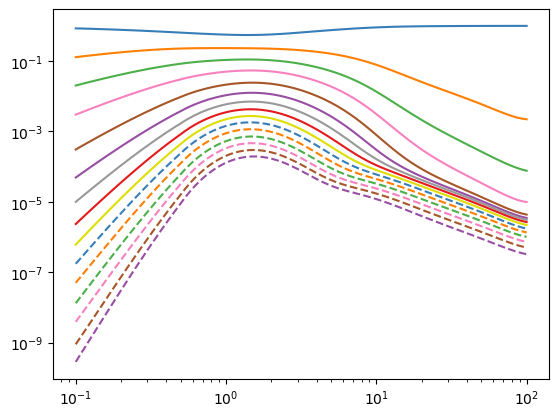

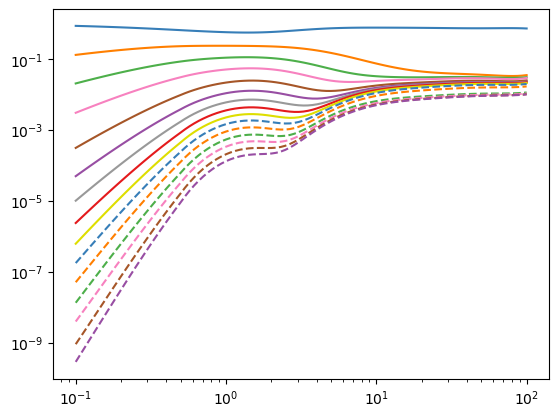

In [75]:
plt.loglog(Tev,np.transpose(f_no[indx_X1]))
plt.figure()
plt.loglog(Tev,np.transpose(f_unr[indx_X1]))


(1e-20, 1e-13)

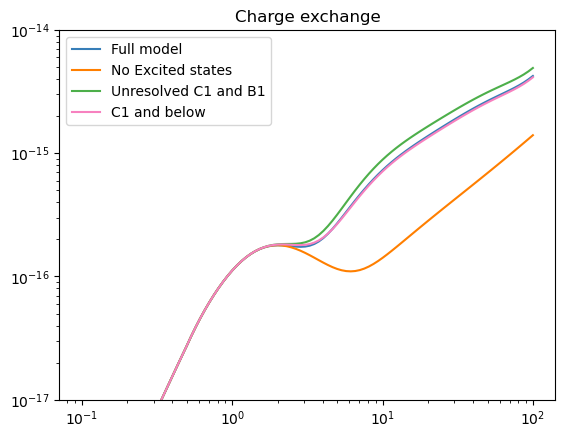

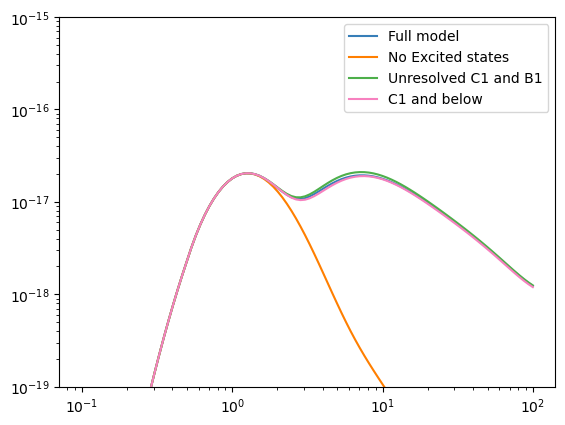

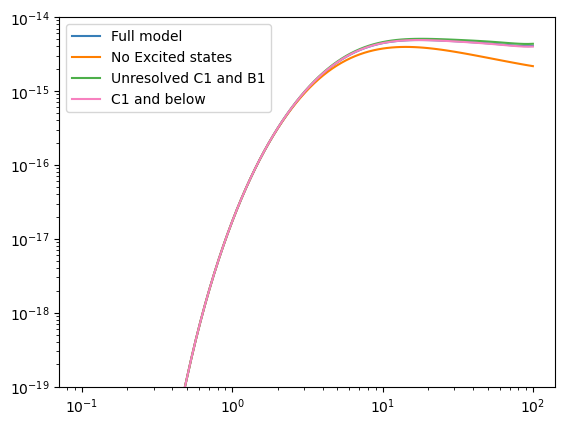

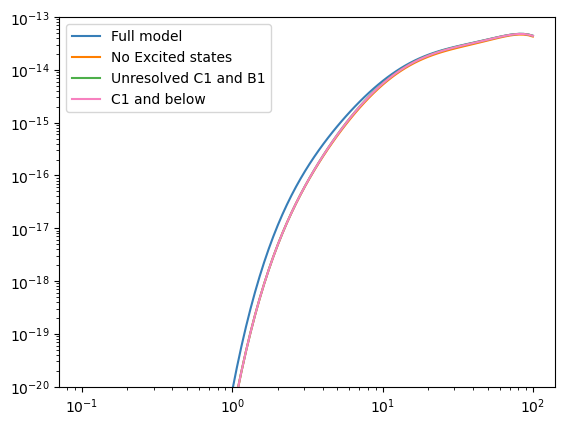

In [128]:
cx,diss,ion,da,vibr_resolved_CX, vibr_resolved_Diss, vibr_resolved_Ion, vibr_resolved_DA, vibr_resolved_DA_B1 = fn.eff_rates(fv_H2,Tev,get_vibr_res=True)

cx_no = np.sum(f_no[indx_X1]*vibr_resolved_CX, axis=0)
cx_unr = np.sum(f_unr[indx_X1]*vibr_resolved_CX, axis=0)
cx_exc = np.sum(f_exc[indx_X1]*vibr_resolved_CX, axis=0)

DA_no = np.sum(f_no[indx_X1]*vibr_resolved_DA, axis=0)
DA_unr = np.sum(f_unr[indx_X1]*vibr_resolved_DA, axis=0)
DA_exc = np.sum(f_exc[indx_X1]*vibr_resolved_DA, axis=0)

diss_no = np.sum(f_no[indx_X1]*vibr_resolved_Diss, axis=0)
diss_unr = np.sum(f_unr[indx_X1]*vibr_resolved_Diss, axis=0)
diss_exc = np.sum(f_exc[indx_X1]*vibr_resolved_Diss, axis=0)

ion_no = np.sum(f_no[indx_X1]*vibr_resolved_Ion[:,:,0], axis=0)
ion_unr = np.sum(f_unr[indx_X1]*vibr_resolved_Ion[:,:,0], axis=0)
ion_exc = np.sum(f_exc[indx_X1]*vibr_resolved_Ion[:,:,0]+f_exc[indx_B1]*vibr_resolved_Ion[:,:,1]+f_exc[indx_C1]*vibr_resolved_Ion[:,:,2], axis=0)




# plt.loglog(Tev,np.transpose(f_unr[:15]))
plt.loglog(Tev,cx, label='Full model')
plt.loglog(Tev,cx_no, label='No Excited states')
plt.loglog(Tev,cx_unr, label='Unresolved C1 and B1')
plt.loglog(Tev,cx_exc, label='C1 and below')
plt.ylim(1e-17, 1e-14)
plt.title('Charge exchange')

plt.legend()

plt.figure()
plt.loglog(Tev,da, label='Full model')
plt.loglog(Tev,DA_no, label='No Excited states')
plt.loglog(Tev,DA_unr, label='Unresolved C1 and B1')
plt.loglog(Tev,DA_exc, label='C1 and below')
plt.legend()
plt.ylim(1e-19, 1e-15)

plt.figure()
plt.loglog(Tev,diss, label='Full model')
plt.loglog(Tev,diss_no, label='No Excited states')
plt.loglog(Tev,diss_unr, label='Unresolved C1 and B1')
plt.loglog(Tev,diss_exc, label='C1 and below')
plt.legend()
plt.ylim(1e-19,1e-14)

plt.figure()
plt.loglog(Tev,ion, label='Full model')
plt.loglog(Tev,ion_no, label='No Excited states')
plt.loglog(Tev,ion_unr, label='Unresolved C1 and B1')
plt.loglog(Tev,ion_exc, label='C1 and below')
plt.legend()
plt.ylim(1e-20,1e-13)




[3.79699641e-56 2.44830602e-54 1.31745803e-52 5.98713101e-51
 2.32360201e-49 7.78243810e-48 2.27167135e-46 5.83238138e-45
 1.32848139e-43 2.70626303e-42 4.96769885e-41 8.27482526e-40
 1.25898692e-38 1.76029740e-37 2.27462258e-36 2.73066072e-35
 3.06031049e-34 3.21617800e-33 3.18248385e-32 2.97617090e-31
 2.63917402e-30 2.22579780e-29 1.78990458e-28 1.37543480e-27
 1.09563631e-26 7.61019493e-26 4.60967660e-25 2.45626468e-24
 1.16079204e-23 4.90274923e-23 1.86411246e-22 6.42423168e-22
 2.01975926e-21 5.82874374e-21 1.55302654e-20 3.84160811e-20
 8.86877397e-20 1.92041828e-19 3.91883589e-19 7.56969426e-19
 1.38987494e-18 2.43529501e-18 4.08691393e-18 6.59151521e-18
 1.02491487e-17 1.54084940e-17 2.24569737e-17 3.18056121e-17
 4.38690722e-17 5.90417509e-17 7.76712770e-17 1.00031221e-16
 1.26295209e-16 1.56514814e-16 1.90603489e-16 2.28328373e-16
 2.69311054e-16 3.13037504e-16 3.58876461e-16 4.06104765e-16
 4.53937545e-16 5.01560859e-16 5.48164350e-16 5.92971697e-16
 6.35267042e-16 6.744161

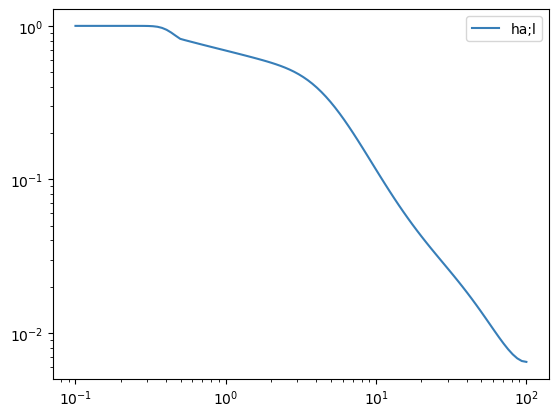

In [127]:
ion_X1 = np.sum(vibr_resolved_Ion[:,:,0]*fv_H2[indx_X1],axis=0)
ion_B1 = np.sum(vibr_resolved_Ion[:,:,1]*fv_H2[indx_B1],axis=0)
ion_exc = ion-np.sum(vibr_resolved_Ion[:,:,0]*fv_H2[indx_X1],axis=0)
# plt.loglog(Tev,ion)
# # plt.plot(Tev,ion_X1,'--')
# # plt.plot(Tev,ion_B1)
# plt.plot(Tev,ion_exc, label='exc')
plt.loglog(Tev,ion_exc/ion, label='ha;l')
plt.legend()
plt.yscale('log')
# plt.ylim(1e-20, 1e-12)
# plt.plot(Tev,cx_no/cx)
# plt.plot(Tev,cx_unr/cx)
# plt.plot(Tev,cx_exc/cx)

# plt.figure()
# plt.plot(Tev,DA_no/da)
# plt.plot(Tev,DA_unr/da)
# plt.plot(Tev,DA_exc/da)
print(ion_exc)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


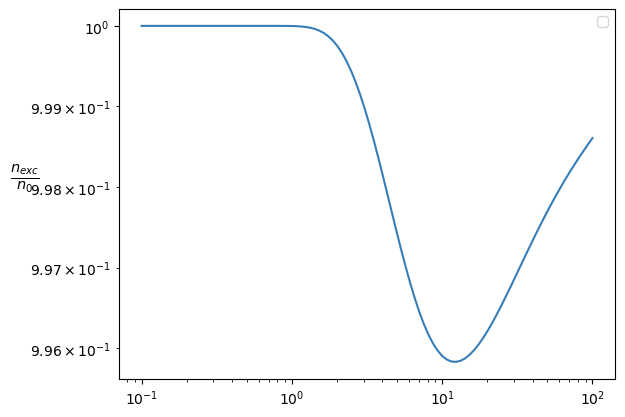

In [142]:
hallo = np.sum(fv_H2[indx_mol[:15]], axis=0)
exc = np.sum(fv_H2[indx_mol[15:]], axis=0)
exc_unr = f_unr[15]+f_unr[16]
exc_exc = np.sum(f_exc[15:45], axis=0)
plt.loglog(Tev,hallo)
# plt.loglog(Tev,exc, label='Full model')
# plt.loglog(Tev,exc_unr, label='B and C unr')
# plt.loglog(Tev,exc_exc, label='No states above C')
# plt.ylim(1e-1,1e1)
plt.ylabel(r'$\frac{n_{exc}}{n_0}$',rotation=0, size=15)
plt.legend()



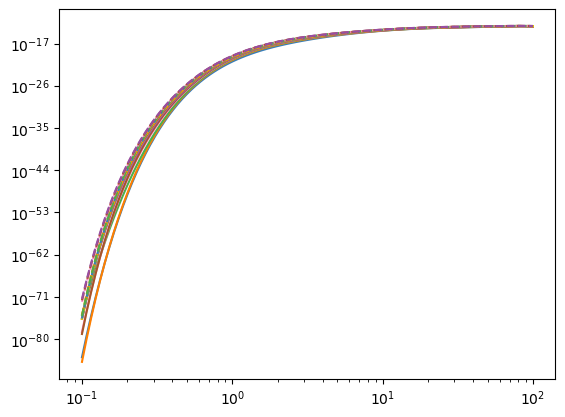

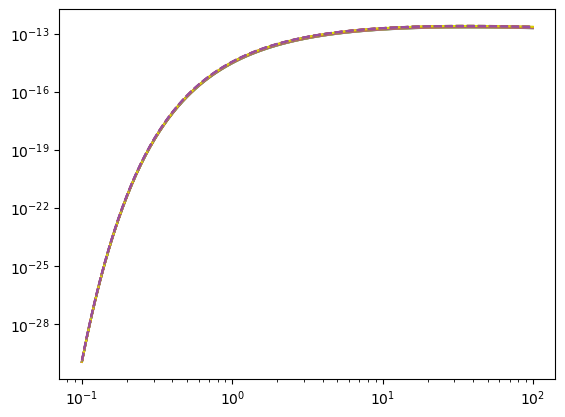

In [132]:
plt.loglog(Tev,np.transpose(vibr_resolved_Ion[:,:,0]))
plt.figure()
plt.loglog(Tev,np.transpose(vibr_resolved_Ion[:,:,6]))
